## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, roc_curve, auc
from sklearn.metrics import average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.experimental import enable_halving_search_cv

from sklearn.model_selection import HalvingGridSearchCV

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 50)

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Data Wrangling

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,23486.0,11742.500000,6779.968547,0.0,5871.25,11742.5,17613.75,23485.0
Clothing ID,23486.0,918.118709,203.298980,0.0,861.00,936.0,1078.00,1205.0
Age,23486.0,43.198544,12.279544,18.0,34.00,41.0,52.00,99.0
Rating,23486.0,4.196032,1.110031,1.0,4.00,5.0,5.00,5.0
Recommended IND,23486.0,0.822362,0.382216,0.0,1.00,1.0,1.00,1.0
Positive Feedback Count,23486.0,2.535936,5.702202,0.0,0.00,1.0,3.00,122.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()
#There is too many missing values

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
#Unuseful column
df.drop(['Unnamed: 0', 'Clothing ID'], axis = 1, inplace=True)

In [ ]:
df.isnull().sum()

Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
df.shape

(23486, 9)

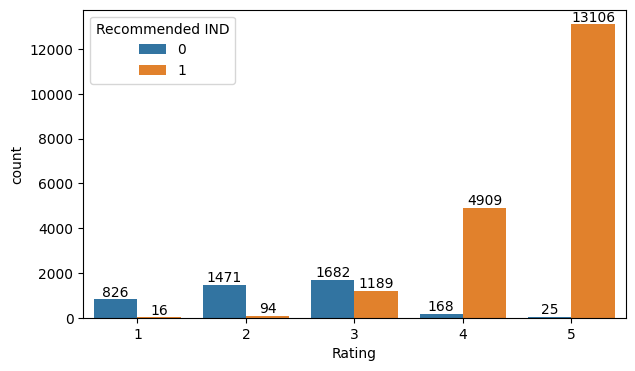

In [ ]:
plt.figure(figsize = (10,7))
ax = sns.countplot(x="Rating",
                   data=df,
                   hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

In [ ]:
df["Recommended IND"].unique()

array([1, 0])

In [ ]:
len(df)

23486

In [ ]:
len(df[(df["Rating"] == 1) & (df["Recommended IND"] == 1)])

16

In [ ]:
len(df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))])

23470

In [ ]:
df = df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 2) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 4) & (df["Recommended IND"] == 0))]
df = df[~((df["Rating"] == 5) & (df["Recommended IND"] == 0))]

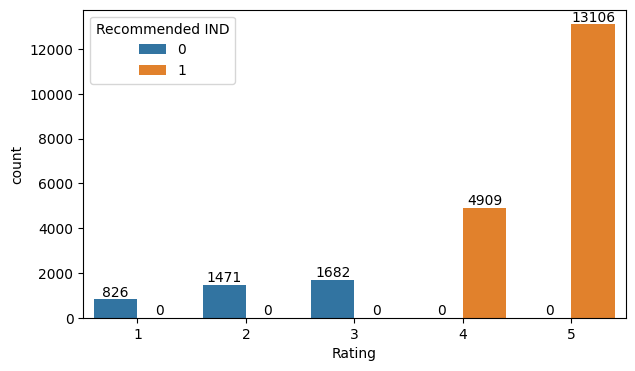

In [ ]:
 #After dropping noisy data
plt.figure(figsize = (10,7))
ax = sns.countplot(x="Rating",
                   data=df,
                   hue = "Recommended IND")
for p in ax.containers:
  ax.bar_label(p)
 

#### Check Proportion of Target Class Variable:

In [ ]:
df['Recommended IND'].value_counts()

1    18015
0     3979
Name: Recommended IND, dtype: int64

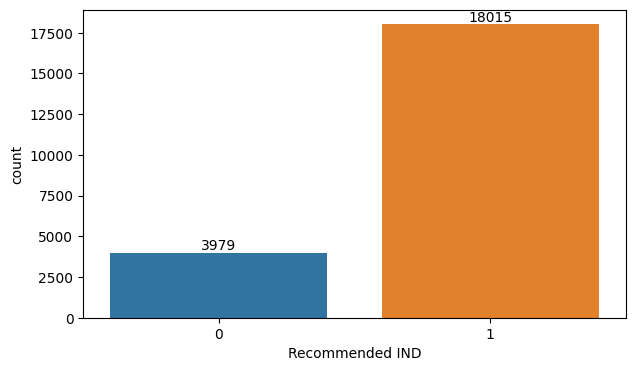

In [ ]:
plt.figure(figsize = (10,7))
ax = sns.countplot(data =df, x = "Recommended IND")
ax.bar_label(ax.containers[0]);
# Recommended =1 values are more dominating then Not Recommendation =0 (imbalanced)

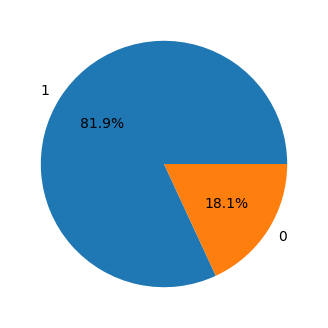

In [ ]:
plt.figure(figsize = (10,7))
df['Recommended IND'].value_counts().plot(kind="pie", autopct="%1.1f%%");
plt.ylabel("");

## 2. Feature Selection and Data Cleaning




### Feature Selection and Rename Column Name

In [ ]:
df = df[['Review Text', 'Recommended IND']]

In [ ]:
df

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
23479,So i wasn't sure about ordering this skirt bec...,1
23480,NaN,1
23481,I was very happy to snag this dress at such a ...,1
23483,"This fit well, but the top was very see throug...",0


In [ ]:
df.rename(columns={"Review Text":"Text", "Recommended IND":"Recommended_IND"},
          inplace=True)

In [ ]:
df

,Text,Recommended_IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
23479,So i wasn't sure about ordering this skirt bec...,1
23480,NaN,1
23481,I was very happy to snag this dress at such a ...,1
23483,"This fit well, but the top was very see throug...",0


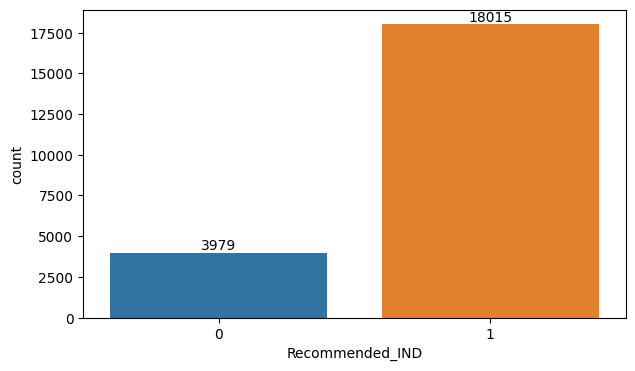

In [ ]:
ax = sns.countplot(data =df, x = "Recommended_IND")
ax.bar_label(ax.containers[0]);

### Missing Value Detection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21994 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Text             21175 non-null  object
 1   Recommended_IND  21994 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 515.5+ KB


In [ ]:
df.isnull().sum()

Text               819
Recommended_IND      0
dtype: int64

In [ ]:
#Drop null
df = df.dropna(axis=0,  how = 'all', subset=['Text'])

In [ ]:
df.isnull().sum()

Text               0
Recommended_IND    0
dtype: int64

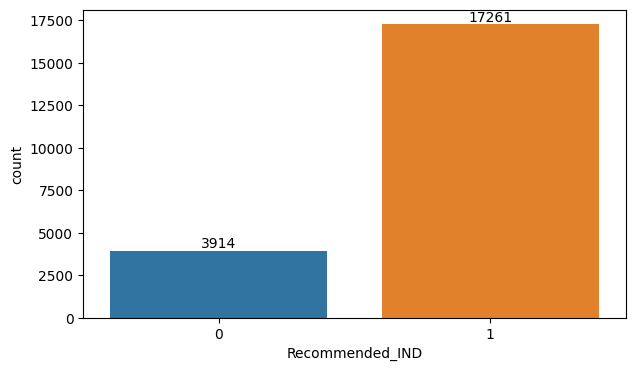

In [ ]:
ax = sns.countplot(data =df, x = "Recommended_IND")
ax.bar_label(ax.containers[0]);

## 3. Text Mining



### Tokenization, Noise Removal, Lexicon Normalization

In [ ]:
stop_words = stopwords.words("english")
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
for i in ["not", "no"]:
        stop_words.remove(i)

In [ ]:
def cleaning(data):

    import re

    #1. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")

    #2. Tokenize
    text_tokens = word_tokenize(data.lower())

    #3. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]


    #6. joining
    return " ".join( text_cleaned)

In [ ]:
prep_df = df.copy()
prep_df['Text'] = prep_df['Text'].apply(cleaning)

In [ ]:
prep_df

,Text,Recommended_IND
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
2,high hope dress really wanted work initially o...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1
...,...,...
23478,surprised positive review product terrible cut...,0
23479,wasnt sure ordering skirt couldnt see person f...,1
23481,happy snag dress great price easy slip flatter...,1
23483,fit well top see never would worked im glad ab...,0


In [ ]:
prep_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21175 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Text             21175 non-null  object
 1   Recommended_IND  21175 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 496.3+ KB


In [ ]:
prep_df.isnull().sum()

Text               0
Recommended_IND    0
dtype: int64

In [ ]:
prep_df.duplicated().sum()

9

In [ ]:
prep_df.drop_duplicates(inplace = True)
#Drop duplicate data

In [ ]:
prep_df.duplicated().sum()

0

In [ ]:
df['Text']
#before cleaning

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23478    I was surprised at the positive reviews for th...
23479    So i wasn't sure about ordering this skirt bec...
23481    I was very happy to snag this dress at such a ...
23483    This fit well, but the top was very see throug...
23485    This dress in a lovely platinum is feminine an...
Name: Text, Length: 21175, dtype: object

In [ ]:
prep_df['Text']
#After cleaning

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
2        high hope dress really wanted work initially o...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
                               ...                        
23478    surprised positive review product terrible cut...
23479    wasnt sure ordering skirt couldnt see person f...
23481    happy snag dress great price easy slip flatter...
23483    fit well top see never would worked im glad ab...
23485    dress lovely platinum feminine fit perfectly e...
Name: Text, Length: 21166, dtype: object

## 4. WordCloud - Repetition of Words

### Detect Reviews (positive and negative separately)

In [ ]:
prep_df[prep_df["Recommended_IND"] == 0].head()

,Text,Recommended_IND
2,high hope dress really wanted work initially o...,0
5,love tracy reese dress one not petite foot tal...,0
10,dress run small esp zipper area run ordered sp...,0
22,first not pullover styling side zipper wouldnt...,0
25,loved material didnt really look long dress pu...,0


In [ ]:
prep_df[prep_df["Recommended_IND"] == 1].head()

,Text,Recommended_IND
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1
6,aded basket hte last mintue see would look lik...,1


### Collect Words (positive and negative separately)

In [ ]:
positive_words = prep_df.loc[prep_df['Recommended_IND'] == 1]

In [ ]:
positive_words.head()

,Text,Recommended_IND
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1
6,aded basket hte last mintue see would look lik...,1


In [ ]:
positives = " ".join(positive_words['Text'])

In [ ]:
negative_words = prep_df.loc[prep_df['Recommended_IND'] == 0]

In [ ]:
negative_words.head()

,Text,Recommended_IND
2,high hope dress really wanted work initially o...,0
5,love tracy reese dress one not petite foot tal...,0
10,dress run small esp zipper area run ordered sp...,0
22,first not pullover styling side zipper wouldnt...,0
25,loved material didnt really look long dress pu...,0


In [ ]:
negatives = " ".join(negative_words['Text'])

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [ ]:
from wordcloud import WordCloud

In [ ]:
#pip install wordcloud

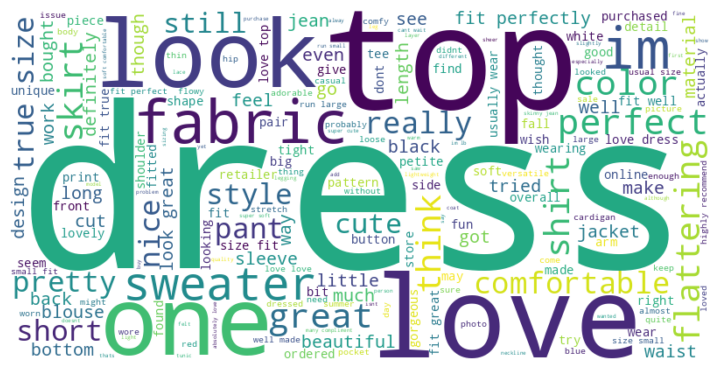

In [ ]:
plt.axis("off")
#making the wordCloud
wordcloud_p = WordCloud( background_color="white", width=800, height=400).generate(positives)
plt.tight_layout(pad=0)
#displaying wordCloud
plt.imshow(wordcloud_p, interpolation='bilinear')
plt.show()

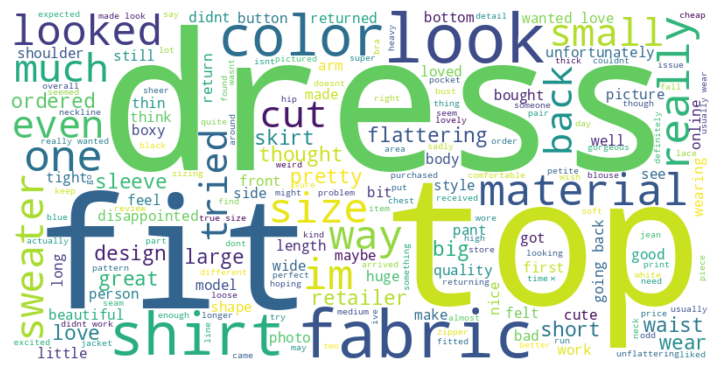

In [ ]:
plt.axis("off")
#making the wordCloud
wordcloud_n = WordCloud( background_color="white", width=800, height=400).generate(negatives)
plt.tight_layout(pad=0)
#displaying wordCloud
plt.imshow(wordcloud_n, interpolation='bilinear')
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model



### Train - Test Split

In [ ]:
X = prep_df["Text"]
y = prep_df["Recommended_IND"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=42)

### Count Vectorization

In [ ]:
vectorizer = CountVectorizer(preprocessor = cleaning, min_df=3)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
df_train_count_vic = pd.DataFrame(X_train_count.toarray(),
                                  columns = vectorizer.get_feature_names_out(),
                                  index= X_train.index)
df_test_count_vic = pd.DataFrame(X_test_count.toarray(),
                                 columns = vectorizer.get_feature_names_out(),
                                 index= X_test.index)

### TF-IDF

In [ ]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
df_train_tfidf = pd.DataFrame(X_train_tf_idf.toarray(),
                              columns = tf_idf_vectorizer.get_feature_names_out(),
                              index= X_train.index)

df_test_tfidf = pd.DataFrame(X_test_tf_idf.toarray(),
                             columns = tf_idf_vectorizer.get_feature_names_out(),
                             index= X_test.index)

### Eval Function

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.metrics import plot_confusion_matrix
def eval_metric(model, X_train, y_train, X_test, y_test):
    # ... (other code)

    print("\tTest_Set\n")
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix (Test Set)', fontsize=18)
    plt.show()
    print(classification_report(y_test, y_pred))
    print()

    print("\tTrain_Set\n")
    y_train_pred = model.predict(X_train)
    conf_matrix_train = confusion_matrix(y_train, y_train_pred)
    sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix (Training Set)', fontsize=18)
    plt.show()
    print(classification_report(y_train, y_train_pred))

In [ ]:
#roc curve
def roc_auc_plot(model, y_train, X_train, y_test, X_test):
    pred_train = model.predict(X_train).ravel()
    pred_test = model.predict(X_test).ravel()
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, pred_train)
    fpr_keras_test, tpr_keras_test, thresholds_keras_test = roc_curve(y_test, pred_test)


    auc_keras = auc(fpr_keras, tpr_keras)
    auc_keras_test = auc(fpr_keras_test, tpr_keras_test)


    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='train (area = {:.3f})'.format(auc_keras))
    plt.plot(fpr_keras_test, tpr_keras_test, label='val (area = {:.3f})'.format(auc_keras_test))

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

In [ ]:
def eval_scores(model, X_train, y_train):
    scoring = {'accuracy': make_scorer(accuracy_score),
            'precision': make_scorer(precision_score, average=None, labels=[0]),
            'recall': make_scorer(recall_score, average=None, labels = [0]),
            'f1': make_scorer(f1_score, average=None, labels = [0])}

    scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5, return_train_score=True)
    df_scores = pd.DataFrame(scores, index = range(1,6))
    return df_scores

## Logistic Regression

### CountVectorizer

In [ ]:
logisitc_model = LogisticRegression(C=0.01,
                         max_iter=1000,
                         class_weight= "balanced",
                         random_state=101)
logisitc_model.fit(X_train_count, y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [ ]:
logistic_scores = eval_scores(logisitc_model, X_train_count, y_train)
logistic_scores.mean()[2:]

test_accuracy      0.870860
train_accuracy     0.883524
test_precision     0.605877
train_precision    0.629540
test_recall        0.865130
train_recall       0.899205
test_f1            0.712534
train_f1           0.740586
dtype: float64

	Test_Set



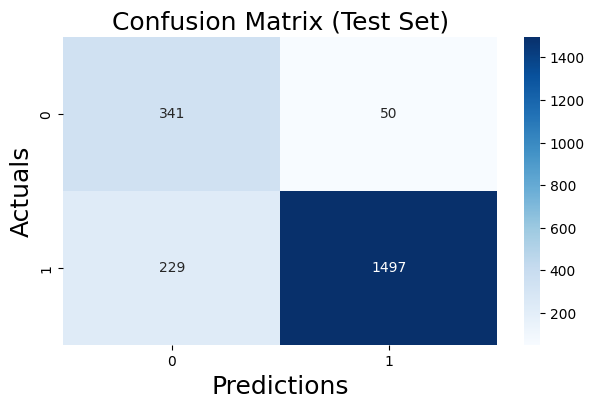

              precision    recall  f1-score   support

           0       0.60      0.87      0.71       391
           1       0.97      0.87      0.91      1726

    accuracy                           0.87      2117
   macro avg       0.78      0.87      0.81      2117
weighted avg       0.90      0.87      0.88      2117


	Train_Set



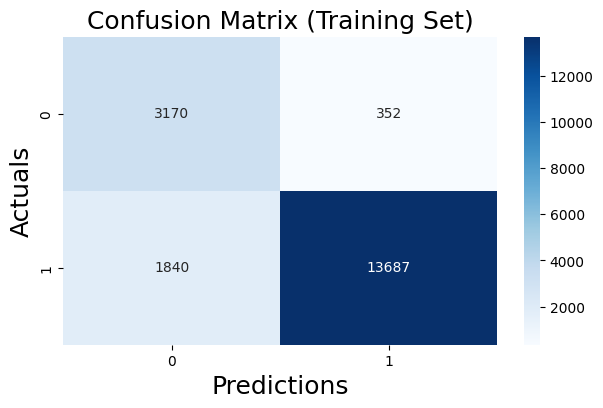

              precision    recall  f1-score   support

           0       0.63      0.90      0.74      3522
           1       0.97      0.88      0.93     15527

    accuracy                           0.88     19049
   macro avg       0.80      0.89      0.83     19049
weighted avg       0.91      0.88      0.89     19049



In [ ]:
eval_metric(logisitc_model, X_train_count, y_train, X_test_count, y_test)

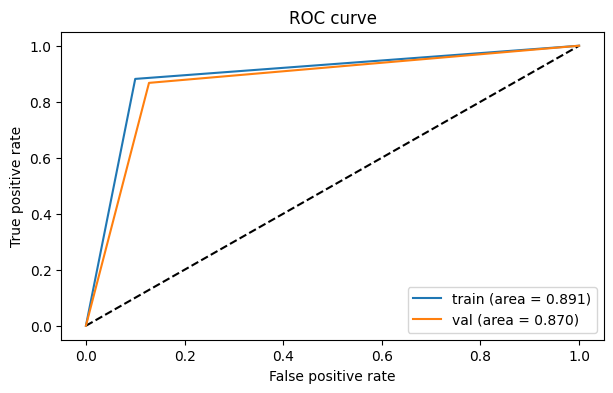

In [ ]:
roc_auc_plot(logisitc_model, y_train, X_train_count, y_test, X_test_count)

In [ ]:
y_pred = logisitc_model.predict(X_test_count)
y_pred_proba= logisitc_model.predict_proba(X_test_count)[:,1]

log_AP_count = average_precision_score(y_test, y_pred_proba)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
logisitc_model_tf = LogisticRegression(C=0.06,
                         max_iter=1000,
                         random_state=101,
                         class_weight="balanced")
logisitc_model_tf.fit(X_train_tf_idf, y_train)

LogisticRegression(C=0.06, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [ ]:
logistic_scores_tf_idf = eval_scores(logisitc_model_tf, X_train_tf_idf, y_train)
logistic_scores_tf_idf.mean()[2:]

test_accuracy      0.863983
train_accuracy     0.873589
test_precision     0.589000
train_precision    0.606267
test_recall        0.876206
train_recall       0.902328
test_f1            0.704405
train_f1           0.725245
dtype: float64

	Test_Set



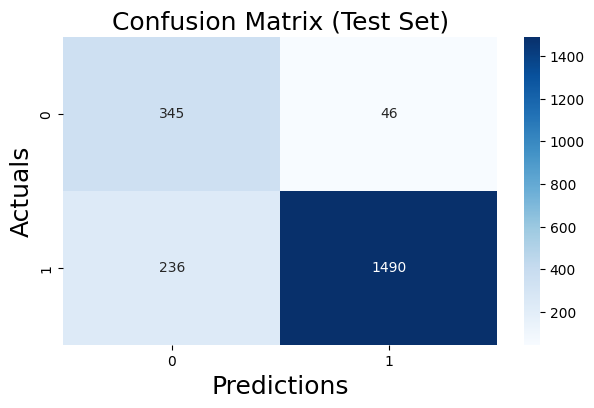

              precision    recall  f1-score   support

           0       0.59      0.88      0.71       391
           1       0.97      0.86      0.91      1726

    accuracy                           0.87      2117
   macro avg       0.78      0.87      0.81      2117
weighted avg       0.90      0.87      0.88      2117


	Train_Set



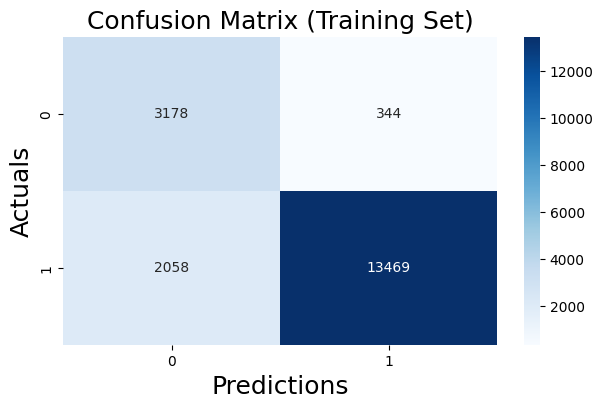

              precision    recall  f1-score   support

           0       0.61      0.90      0.73      3522
           1       0.98      0.87      0.92     15527

    accuracy                           0.87     19049
   macro avg       0.79      0.88      0.82     19049
weighted avg       0.91      0.87      0.88     19049



In [ ]:
eval_metric(logisitc_model_tf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

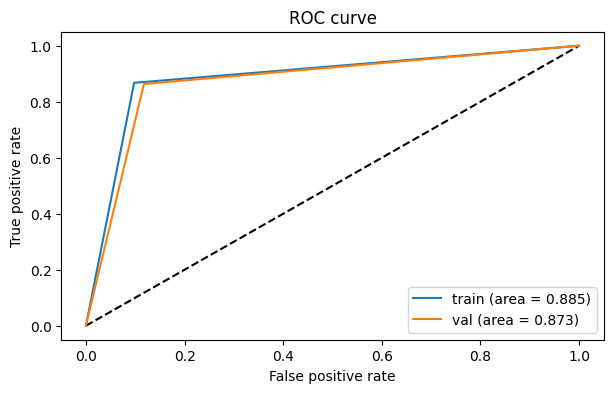

In [ ]:
roc_auc_plot(logisitc_model_tf, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

In [ ]:
y_pred = logisitc_model_tf.predict(X_test_tf_idf)
y_pred_proba= logisitc_model_tf.predict_proba(X_test_tf_idf)[:,1]


log_AP_tfidf = average_precision_score(y_test, y_pred_proba)
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

### Gridsearch

In [ ]:
parameters_lr = [{'penalty':['l2', 'l1'],'C': [0.1, 0.5, 1],
                  'class_weight':['balanced', {0:3, 1:1}],
                  'solver':['liblinear', 'saga'],
                  'max_iter':[10000]}]

logistic_model_gs = LogisticRegression()

f1_0 = make_scorer(f1_score,
                   average=None,
                   labels = [0])

grid_search_lr = HalvingGridSearchCV(logistic_model_gs,
                                     parameters_lr,
                                     max_resources=20,
                                     scoring = f1_0,
                                     cv = 5,
                                     n_jobs = -1,
                                     random_state=0)

grid_search_lr.fit(X_train_tf_idf,
                   y_train)

best_accuracy_lr = grid_search_lr.best_score_

best_paramaeter_lr = grid_search_lr.best_params_

print("Best class 0 f1-score of LR: {:.2f} %".format(best_accuracy_lr.mean()*100))

print("Best Parameter of LR:", best_paramaeter_lr)

Best class 0 f1-score of LR: 34.67 %
Best Parameter of LR: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
logistic_scores_op = eval_scores(grid_search_lr, X_train_tf_idf, y_train)
logistic_scores_op.mean()[2:]

test_accuracy      0.835844
train_accuracy     0.841593
test_precision     0.536870
train_precision    0.546584
test_recall        0.850076
train_recall       0.864000
test_f1            0.657725
train_f1           0.669327
dtype: float64

	Test_Set



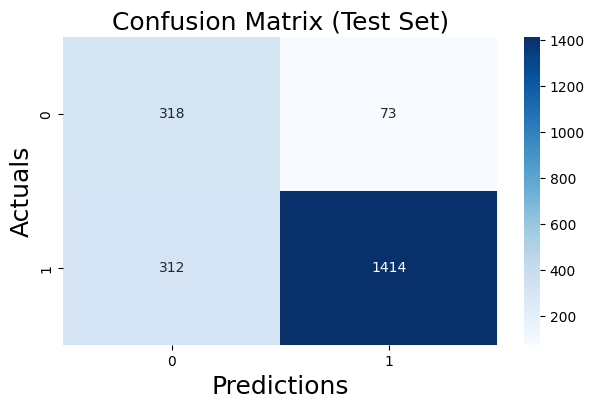

              precision    recall  f1-score   support

           0       0.50      0.81      0.62       391
           1       0.95      0.82      0.88      1726

    accuracy                           0.82      2117
   macro avg       0.73      0.82      0.75      2117
weighted avg       0.87      0.82      0.83      2117


	Train_Set



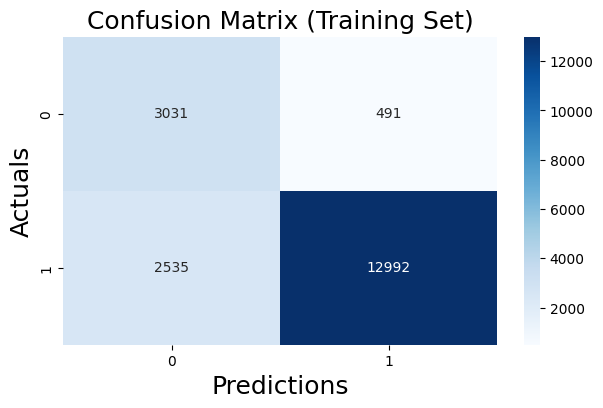

              precision    recall  f1-score   support

           0       0.54      0.86      0.67      3522
           1       0.96      0.84      0.90     15527

    accuracy                           0.84     19049
   macro avg       0.75      0.85      0.78     19049
weighted avg       0.89      0.84      0.85     19049



In [ ]:
eval_metric(grid_search_lr, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

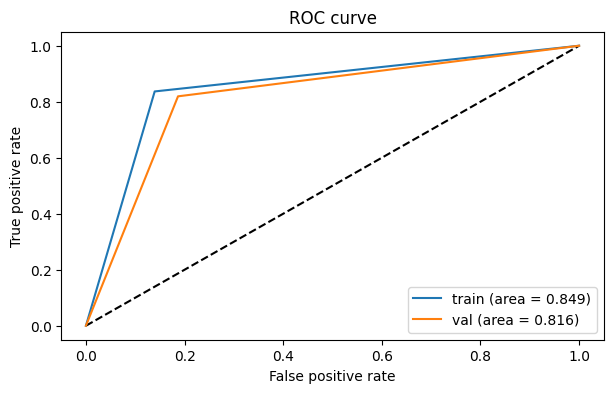

In [ ]:
roc_auc_plot(grid_search_lr, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

## Naive Bayes

### Countvectorizer

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

nb = BernoulliNB()
nb.fit(X_train_tf_idf,y_train)

BernoulliNB()

In [ ]:
nb.fit(X_train_count, y_train)

BernoulliNB()

In [ ]:
nb_scores = eval_scores(nb, X_train_count, y_train)
nb_scores.mean()[2:]

test_accuracy      0.897685
train_accuracy     0.917633
test_precision     0.705984
train_precision    0.754212
test_recall        0.765471
train_recall       0.822615
test_f1            0.734490
train_f1           0.786926
dtype: float64

	Test_Set



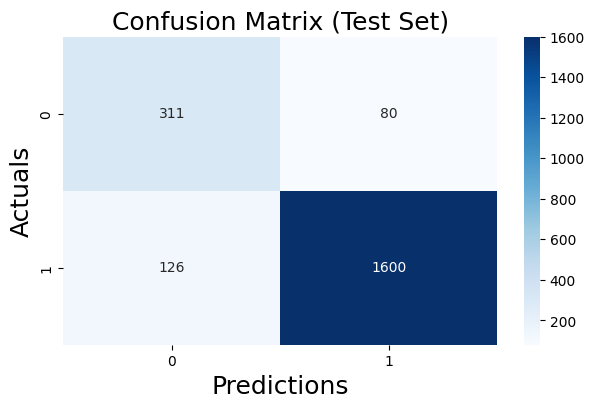

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       391
           1       0.95      0.93      0.94      1726

    accuracy                           0.90      2117
   macro avg       0.83      0.86      0.85      2117
weighted avg       0.91      0.90      0.90      2117


	Train_Set



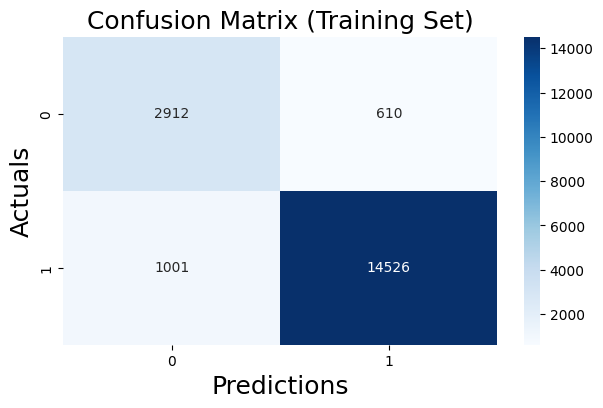

              precision    recall  f1-score   support

           0       0.74      0.83      0.78      3522
           1       0.96      0.94      0.95     15527

    accuracy                           0.92     19049
   macro avg       0.85      0.88      0.87     19049
weighted avg       0.92      0.92      0.92     19049



In [ ]:
eval_metric(nb, X_train_count, y_train, X_test_count, y_test)

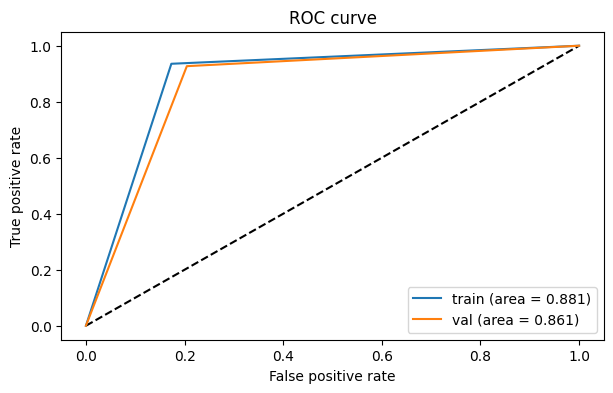

In [ ]:
roc_auc_plot(nb, y_train, X_train_count, y_test, X_test_count)

In [ ]:
y_pred = nb.predict(X_test_count)
y_pred_proba= nb.predict_proba(X_test_count)[:,1]

nb_AP_count = average_precision_score(y_test, y_pred_proba)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
nb_count_tf = BernoulliNB()

In [ ]:
nb_count_tf.fit(X_train_tf_idf, y_train)

BernoulliNB()

In [ ]:
nb_scores_tf = eval_scores(nb_count_tf, X_train_tf_idf, y_train)
nb_scores_tf.mean()[2:]

test_accuracy      0.894220
train_accuracy     0.919261
test_precision     0.733947
train_precision    0.807359
test_recall        0.670920
train_recall       0.739850
test_f1            0.700973
train_f1           0.772124
dtype: float64

	Test_Set



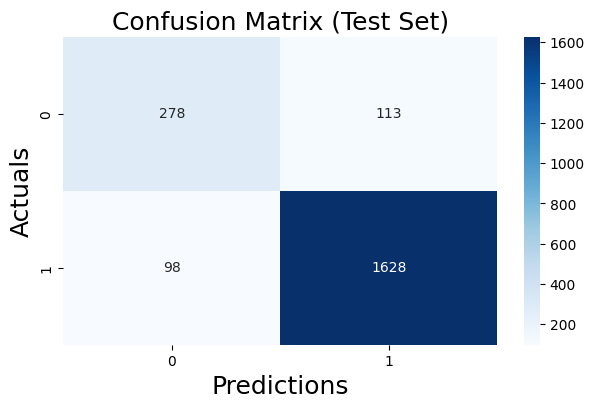

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       391
           1       0.94      0.94      0.94      1726

    accuracy                           0.90      2117
   macro avg       0.84      0.83      0.83      2117
weighted avg       0.90      0.90      0.90      2117


	Train_Set



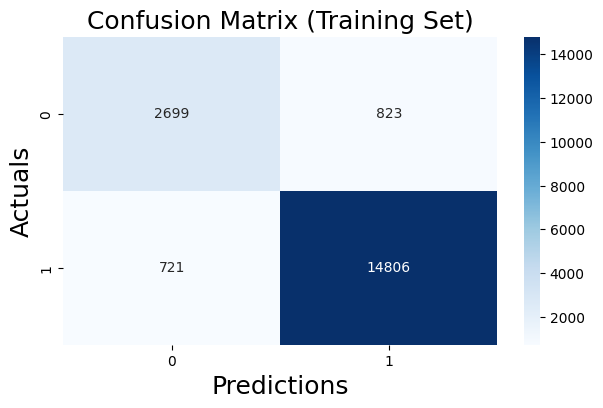

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      3522
           1       0.95      0.95      0.95     15527

    accuracy                           0.92     19049
   macro avg       0.87      0.86      0.86     19049
weighted avg       0.92      0.92      0.92     19049



In [ ]:
eval_metric(nb_count_tf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

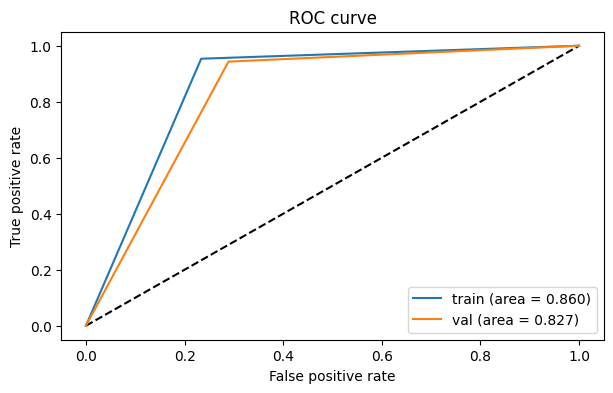

In [ ]:
roc_auc_plot(nb_count_tf, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

In [ ]:
y_pred = nb_count_tf.predict(X_test_tf_idf)
y_pred_proba= nb_count_tf.predict_proba(X_test_tf_idf)[:,1]


nb_AP_tfidf = average_precision_score(y_test, y_pred_proba)
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [ ]:
svm = SVC()

In [ ]:
svm.fit(X_train_count, y_train)

SVC()

In [ ]:
svm_scores = eval_scores(svm, X_train_count, y_train)
svm_scores.mean()[2:]
#Overfitting

test_accuracy      0.906924
train_accuracy     0.973476
test_precision     0.845319
train_precision    0.968262
test_recall        0.607890
train_recall       0.885576
test_f1            0.707199
train_f1           0.925071
dtype: float64

	Test_Set



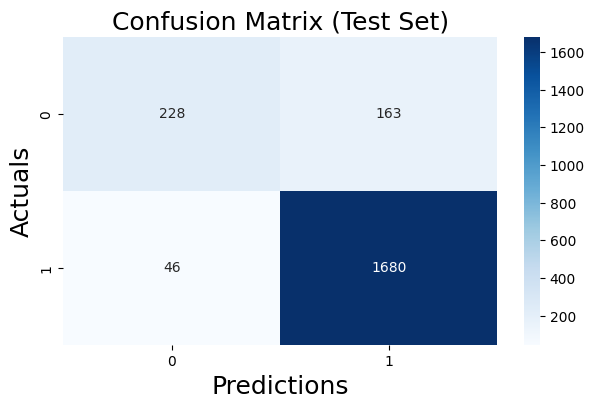

              precision    recall  f1-score   support

           0       0.83      0.58      0.69       391
           1       0.91      0.97      0.94      1726

    accuracy                           0.90      2117
   macro avg       0.87      0.78      0.81      2117
weighted avg       0.90      0.90      0.89      2117


	Train_Set



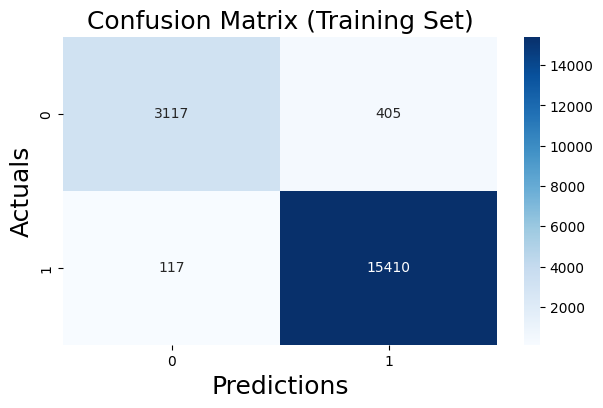

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      3522
           1       0.97      0.99      0.98     15527

    accuracy                           0.97     19049
   macro avg       0.97      0.94      0.95     19049
weighted avg       0.97      0.97      0.97     19049



In [ ]:
eval_metric(svm, X_train_count, y_train, X_test_count, y_test)

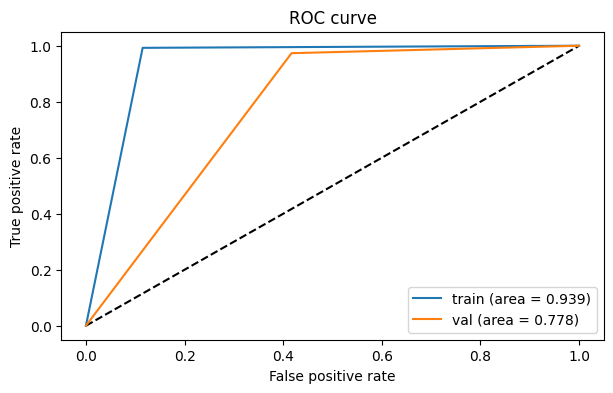

In [ ]:
roc_auc_plot(svm, y_train, X_train_count, y_test, X_test_count)

In [ ]:
y_pred = svm.predict(X_test_count)
decision_function= svm.decision_function(X_test_count)

svc_AP_count = average_precision_score(y_test, decision_function)
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [ ]:
svm_tf = SVC()

In [ ]:
svm_tf.fit(X_train_tf_idf, y_train)

SVC()

In [ ]:
svm_scores_tf = eval_scores(svm_tf, X_train_tf_idf, y_train)
svm_scores_tf.mean()[2:]
#Overfitting

test_accuracy      0.909392
train_accuracy     0.985327
test_precision     0.842322
train_precision    0.984677
test_recall        0.627767
train_recall       0.935193
test_f1            0.719258
train_f1           0.959296
dtype: float64

	Test_Set



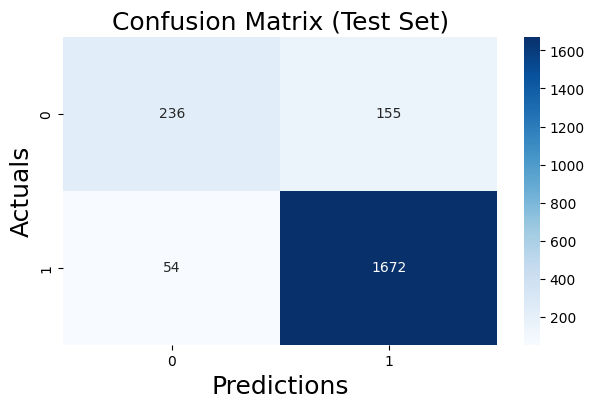

              precision    recall  f1-score   support

           0       0.81      0.60      0.69       391
           1       0.92      0.97      0.94      1726

    accuracy                           0.90      2117
   macro avg       0.86      0.79      0.82      2117
weighted avg       0.90      0.90      0.90      2117


	Train_Set



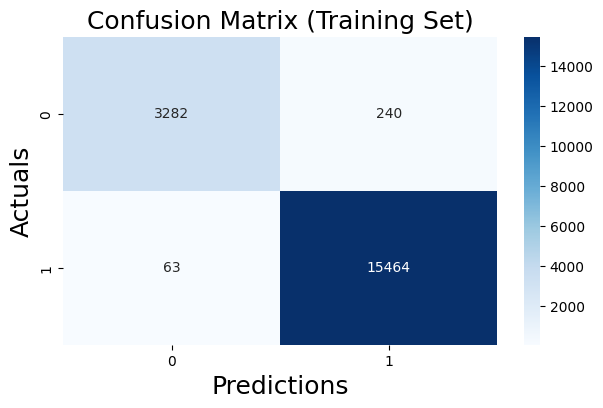

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      3522
           1       0.98      1.00      0.99     15527

    accuracy                           0.98     19049
   macro avg       0.98      0.96      0.97     19049
weighted avg       0.98      0.98      0.98     19049



In [ ]:
eval_metric(svm_tf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

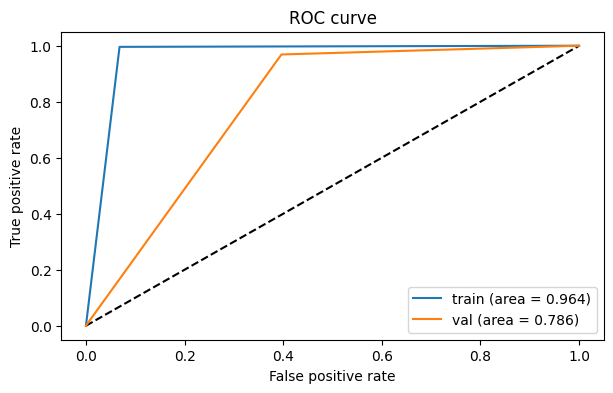

In [ ]:
roc_auc_plot(svm_tf, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

In [ ]:
y_pred = svm_tf.predict(X_test_tf_idf)
decision_function= svm_tf.decision_function(X_test_tf_idf)

svc_AP_tfidf = average_precision_score(y_test, decision_function)
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

### Gridsearch

In [ ]:
parameters_svc = [{'C': [0.1, 1, 10],
                   'kernel': ['linear', 'rbf'],
                   'class_weight': ['balanced', None]}]

svc_model_gs = SVC()
f1_0 = make_scorer(f1_score,
                   average=None,
                   labels=[0])
grid_search_svc = HalvingGridSearchCV(svc_model_gs,
                                      parameters_svc,
                                      max_resources=20,
                                      scoring=f1_0,
                                      cv=5,
                                      n_jobs=-1,
                                      random_state=0)

grid_search_svc.fit(X_train_tf_idf,
                    y_train)
best_accuracy_svc = grid_search_svc.best_score_
best_parameter_svc = grid_search_svc.best_params_
print("Best class 0 f1-score of SVC: {:.2f} %".format(best_accuracy_svc.mean() * 100))
print("Best Parameter of SVC:", best_parameter_svc)


Best class 0 f1-score of SVC: 0.00 %
Best Parameter of SVC: {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear'}


In [ ]:
SVC_scores_op = eval_scores(grid_search_svc, X_train_tf_idf, y_train)
SVC_scores_op.mean()[2:]

test_accuracy      0.877317
train_accuracy     0.892763
test_precision     0.615768
train_precision    0.644843
test_recall        0.895226
train_recall       0.934980
test_f1            0.729628
train_f1           0.763266
dtype: float64

	Test_Set



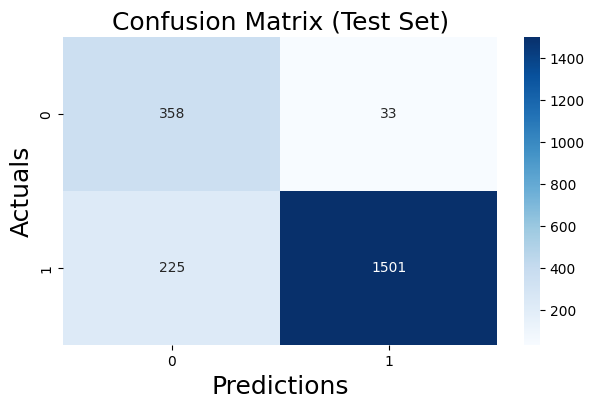

              precision    recall  f1-score   support

           0       0.61      0.92      0.74       391
           1       0.98      0.87      0.92      1726

    accuracy                           0.88      2117
   macro avg       0.80      0.89      0.83      2117
weighted avg       0.91      0.88      0.89      2117


	Train_Set



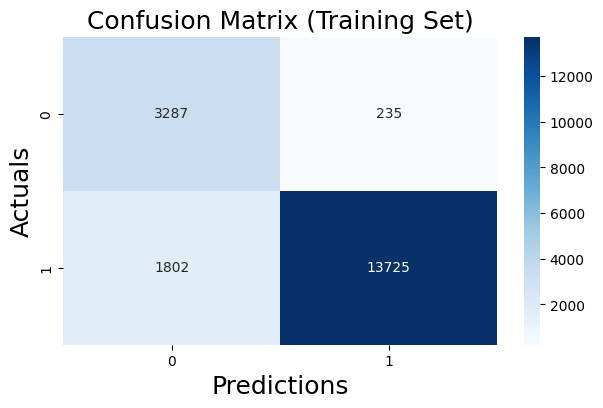

              precision    recall  f1-score   support

           0       0.65      0.93      0.76      3522
           1       0.98      0.88      0.93     15527

    accuracy                           0.89     19049
   macro avg       0.81      0.91      0.85     19049
weighted avg       0.92      0.89      0.90     19049



In [ ]:
eval_metric(grid_search_svc, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

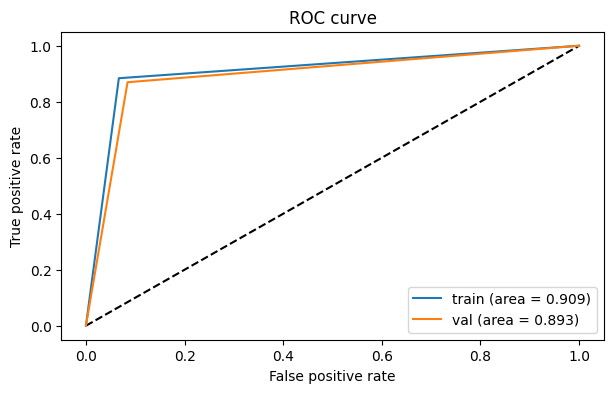

In [ ]:
roc_auc_plot(grid_search_svc, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

## Random Forest

### Countvectorizer

In [ ]:
rf_count = RandomForestClassifier(100,
                            max_depth = 7,
                            random_state = 42,
                            n_jobs = -1,
                            class_weight="balanced")

In [ ]:
rf_count.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=42)

In [ ]:
rf_scores = eval_scores(rf_count, X_train_count, y_train)
rf_scores.mean()[2:]

test_accuracy      0.853693
train_accuracy     0.874731
test_precision     0.573331
train_precision    0.614435
test_recall        0.816296
train_recall       0.866198
test_f1            0.673539
train_f1           0.718868
dtype: float64

	Test_Set



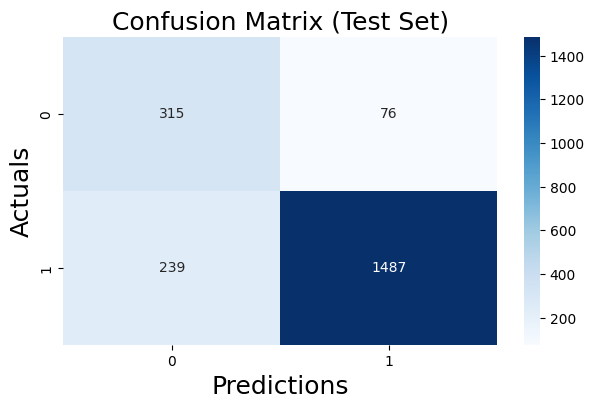

              precision    recall  f1-score   support

           0       0.57      0.81      0.67       391
           1       0.95      0.86      0.90      1726

    accuracy                           0.85      2117
   macro avg       0.76      0.83      0.79      2117
weighted avg       0.88      0.85      0.86      2117


	Train_Set



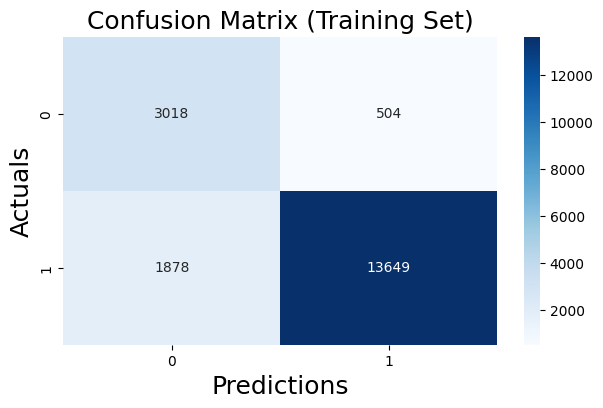

              precision    recall  f1-score   support

           0       0.62      0.86      0.72      3522
           1       0.96      0.88      0.92     15527

    accuracy                           0.87     19049
   macro avg       0.79      0.87      0.82     19049
weighted avg       0.90      0.87      0.88     19049



In [ ]:
eval_metric(rf_count, X_train_count, y_train, X_test_count, y_test)

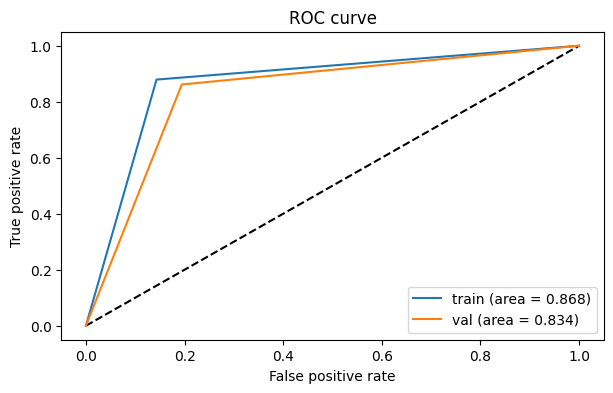

In [ ]:
roc_auc_plot(rf_count, y_train, X_train_count, y_test, X_test_count)

In [ ]:
y_pred = rf_count.predict(X_test_count)
y_pred_proba= rf_count.predict_proba(X_test_count)[:,1]

rf_AP_count = average_precision_score(y_test, y_pred_proba)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
rf_tf= RandomForestClassifier(100,
                            max_depth = 7,
                            random_state = 42,
                            n_jobs = -1,
                            class_weight="balanced")

In [ ]:
rf_tf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=42)

In [ ]:
rf_scores_tf = eval_scores(rf_tf, X_train_tf_idf, y_train)
rf_scores_tf.mean()[2:]

test_accuracy      0.844349
train_accuracy     0.868550
test_precision     0.552763
train_precision    0.596348
test_recall        0.833330
train_recall       0.896508
test_f1            0.664509
train_f1           0.716162
dtype: float64

	Test_Set



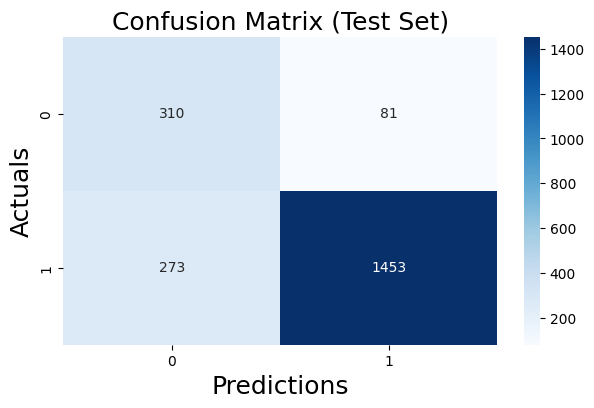

              precision    recall  f1-score   support

           0       0.53      0.79      0.64       391
           1       0.95      0.84      0.89      1726

    accuracy                           0.83      2117
   macro avg       0.74      0.82      0.76      2117
weighted avg       0.87      0.83      0.84      2117


	Train_Set



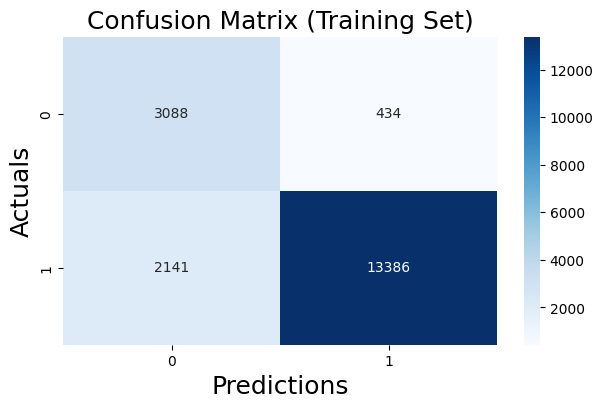

              precision    recall  f1-score   support

           0       0.59      0.88      0.71      3522
           1       0.97      0.86      0.91     15527

    accuracy                           0.86     19049
   macro avg       0.78      0.87      0.81     19049
weighted avg       0.90      0.86      0.87     19049



In [ ]:
eval_metric(rf_tf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

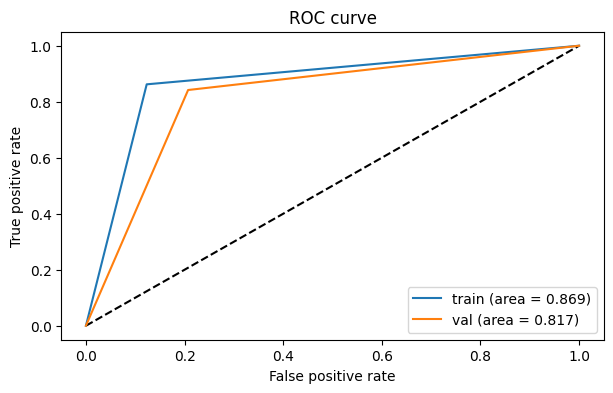

In [ ]:
roc_auc_plot(rf_tf, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

In [ ]:
y_pred = rf_tf.predict(X_test_tf_idf)
y_pred_proba= rf_tf.predict_proba(X_test_tf_idf)[:,1]

rf_AP_tfidf = average_precision_score(y_test, y_pred_proba)
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

### Gridsearch

In [ ]:
rf = RandomForestClassifier()

# Create a parameter grid for the hyperparameters you want to tune.
param_grid_RF = [{'n_estimators': [100, 200, 300],
                  'max_depth': [4, 5, 6],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4],
                  'class_weight': ['balanced', None]}]

f1_0 = make_scorer(f1_score,
                   average=None,
                   labels=[0])

# Perform GridSearch with cross-validation to find the best combination of hyperparameters.
grid_search_RF = HalvingGridSearchCV(estimator=rf, param_grid=param_grid_RF,max_resources=20, cv=5, n_jobs=-1,scoring=f1_0,random_state=0)
grid_search_RF.fit(X_train_tf_idf, y_train)

best_accuracy_RF = grid_search_RF.best_score_
best_parameter_RF = grid_search_RF.best_params_
print("Best class 0 f1-score of RF: {:.2f} %".format(best_accuracy_RF.mean() * 100))
print("Best Parameter of RF:", best_parameter_RF)


Best class 0 f1-score of RF: 13.33 %
Best Parameter of RF: {'class_weight': 'balanced', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
RF_scores_op = eval_scores(grid_search_RF, X_train_tf_idf, y_train)
RF_scores_op.mean()[2:]

test_accuracy      0.834847
train_accuracy     0.851685
test_precision     0.535558
train_precision    0.565546
test_recall        0.817439
train_recall       0.859951
test_f1            0.646777
train_f1           0.681986
dtype: float64

	Test_Set



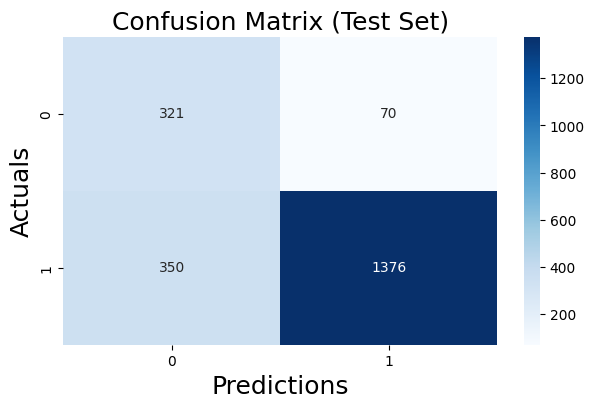

              precision    recall  f1-score   support

           0       0.48      0.82      0.60       391
           1       0.95      0.80      0.87      1726

    accuracy                           0.80      2117
   macro avg       0.71      0.81      0.74      2117
weighted avg       0.86      0.80      0.82      2117


	Train_Set



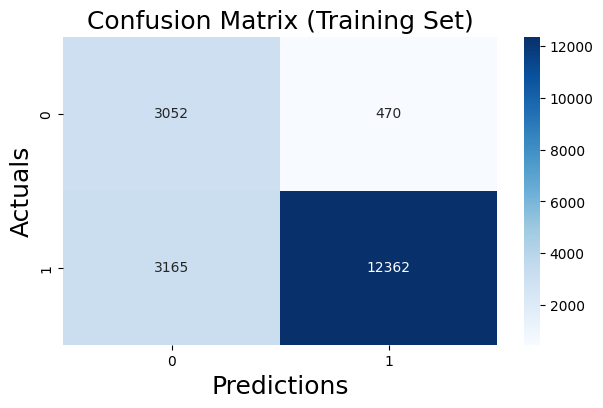

              precision    recall  f1-score   support

           0       0.49      0.87      0.63      3522
           1       0.96      0.80      0.87     15527

    accuracy                           0.81     19049
   macro avg       0.73      0.83      0.75     19049
weighted avg       0.88      0.81      0.83     19049



In [ ]:
eval_metric(grid_search_RF, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

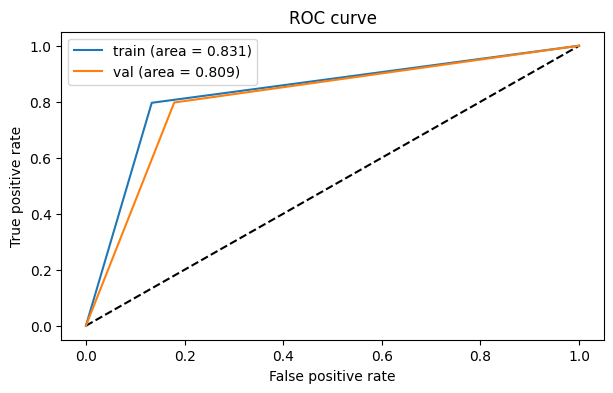

In [ ]:
roc_auc_plot(grid_search_RF, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

## Ada Boosting

### Countvectorizer

In [ ]:
ada = AdaBoostClassifier()

In [ ]:
ada.fit(X_train_count, y_train)

AdaBoostClassifier()

In [ ]:
ada_scores = eval_scores(ada, X_train_count, y_train)
ada_scores.mean()[2:]

test_accuracy      0.873117
train_accuracy     0.877343
test_precision     0.725458
train_precision    0.740159
test_recall        0.505110
train_recall       0.518668
test_f1            0.595514
train_f1           0.609905
dtype: float64

	Test_Set



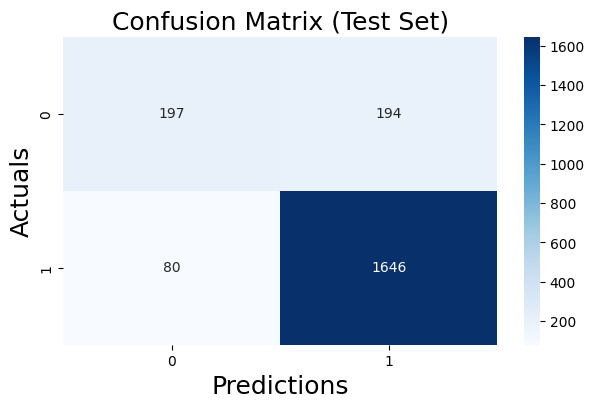

              precision    recall  f1-score   support

           0       0.71      0.50      0.59       391
           1       0.89      0.95      0.92      1726

    accuracy                           0.87      2117
   macro avg       0.80      0.73      0.76      2117
weighted avg       0.86      0.87      0.86      2117


	Train_Set



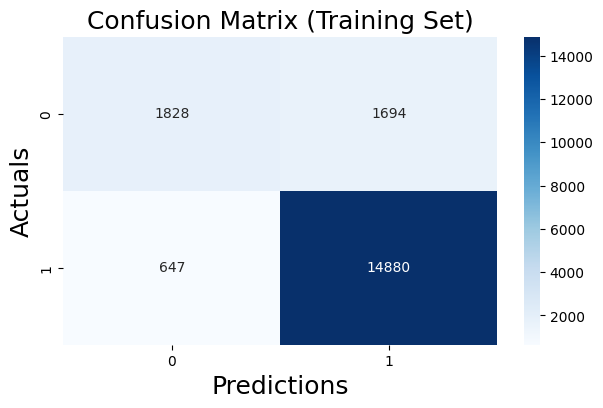

              precision    recall  f1-score   support

           0       0.74      0.52      0.61      3522
           1       0.90      0.96      0.93     15527

    accuracy                           0.88     19049
   macro avg       0.82      0.74      0.77     19049
weighted avg       0.87      0.88      0.87     19049



In [ ]:
eval_metric(ada, X_train_count, y_train, X_test_count, y_test)

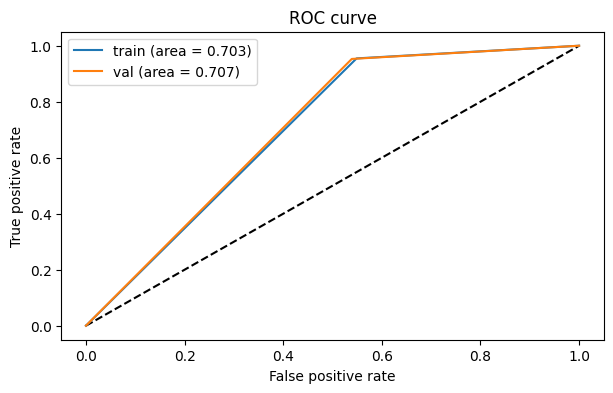

In [ ]:
roc_auc_plot(ada, y_train, X_train_count, y_test, X_test_count)

In [ ]:
y_pred = ada.predict(X_test_count)
y_pred_proba= ada.predict_proba(X_test_count)[:,1]

ada_AP_count = average_precision_score(y_test, y_pred_proba)
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [ ]:
ada_tf= AdaBoostClassifier()

In [ ]:
ada_tf.fit(X_train_tf_idf, y_train)

AdaBoostClassifier()

In [ ]:
ada_scores_tf = eval_scores(ada_tf, X_train_tf_idf, y_train)
ada_scores_tf.mean()[2:]

test_accuracy      0.872172
train_accuracy     0.880545
test_precision     0.718550
train_precision    0.747172
test_recall        0.507382
train_recall       0.534924
test_f1            0.594717
train_f1           0.623462
dtype: float64

	Test_Set



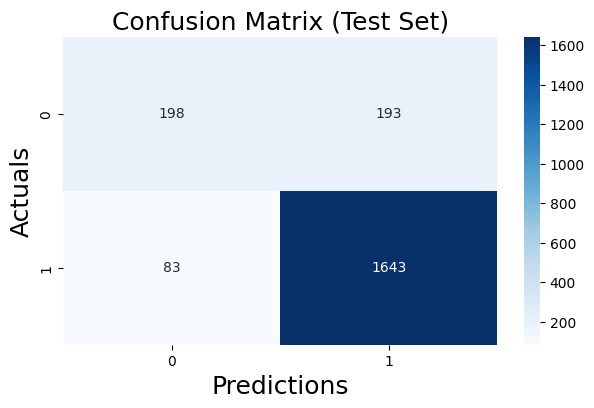

              precision    recall  f1-score   support

           0       0.70      0.51      0.59       391
           1       0.89      0.95      0.92      1726

    accuracy                           0.87      2117
   macro avg       0.80      0.73      0.76      2117
weighted avg       0.86      0.87      0.86      2117


	Train_Set



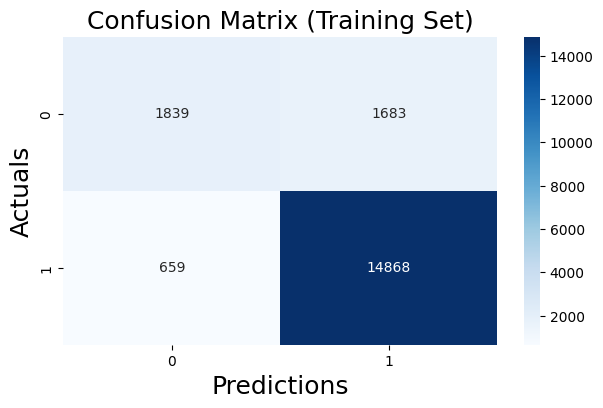

              precision    recall  f1-score   support

           0       0.74      0.52      0.61      3522
           1       0.90      0.96      0.93     15527

    accuracy                           0.88     19049
   macro avg       0.82      0.74      0.77     19049
weighted avg       0.87      0.88      0.87     19049



In [ ]:
eval_metric(ada_tf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

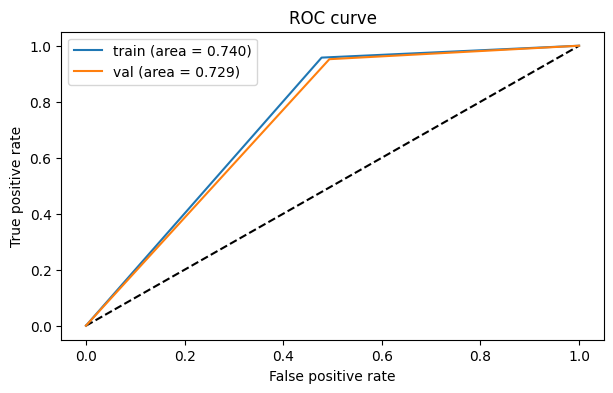

In [ ]:
roc_auc_plot(ada_tf, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

In [ ]:
y_pred = ada_tf.predict(X_test_tf_idf)
y_pred_proba= ada_tf.predict_proba(X_test_tf_idf)[:,1]

ada_AP_tfidf = average_precision_score(y_test, y_pred_proba)
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

### Gridsearch

In [ ]:
parameters_ada = [{'n_estimators': [50, 100, 150],
                   'learning_rate': [0.1, 0.5, 1.0],
                   'algorithm' : ['SAMME', 'SAMME.R'],
                   'base_estimator':['deprecated', None]}]

ada_model_gs = AdaBoostClassifier()
f1_0 = make_scorer(f1_score,
                   average=None,
                   labels=[0])
grid_search_ada = HalvingGridSearchCV(ada_model_gs,
                                      parameters_ada,
                                      max_resources=20,
                                      scoring=f1_0,
                                      cv=5,
                                      n_jobs=-1,
                                      random_state=0)

grid_search_ada.fit(X_train_tf_idf, y_train)
best_accuracy_ada = grid_search_ada.best_score_
best_parameter_ada = grid_search_ada.best_params_
print("Best class 0 f1-score of ada: {:.2f} %".format(best_accuracy_ada.mean() * 100))
print("Best Parameter of ada:", best_parameter_ada)

Best class 0 f1-score of ada: 26.67 %
Best Parameter of ada: {'algorithm': 'SAMME', 'base_estimator': 'deprecated', 'learning_rate': 1.0, 'n_estimators': 100}


In [ ]:
ada_scores_gs = eval_scores(grid_search_ada, X_train_tf_idf, y_train)
ada_scores_gs.mean()[2:]

test_accuracy      0.832011
train_accuracy     0.833443
test_precision     0.645220
train_precision    0.660403
test_recall        0.123223
train_recall       0.127202
test_f1            0.204879
train_f1           0.211662
dtype: float64

	Test_Set



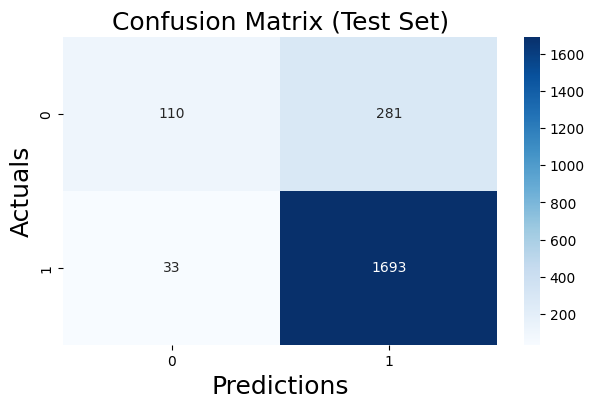

              precision    recall  f1-score   support

           0       0.77      0.28      0.41       391
           1       0.86      0.98      0.92      1726

    accuracy                           0.85      2117
   macro avg       0.81      0.63      0.66      2117
weighted avg       0.84      0.85      0.82      2117


	Train_Set



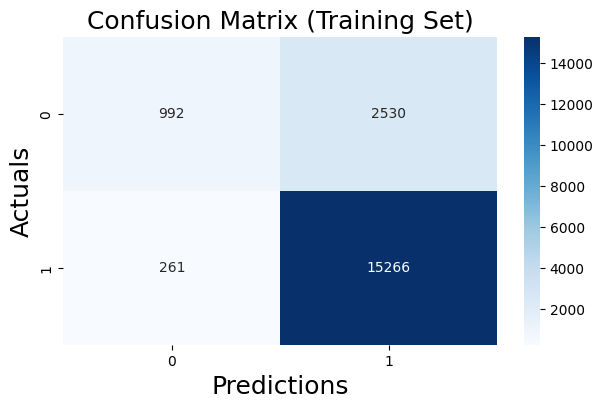

              precision    recall  f1-score   support

           0       0.79      0.28      0.42      3522
           1       0.86      0.98      0.92     15527

    accuracy                           0.85     19049
   macro avg       0.82      0.63      0.67     19049
weighted avg       0.85      0.85      0.82     19049



In [ ]:
eval_metric(grid_search_ada, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

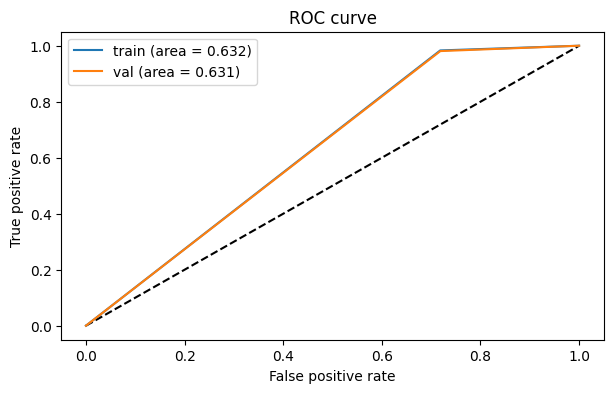

In [ ]:
roc_auc_plot(grid_search_ada, y_train, X_train_tf_idf, y_test, X_test_tf_idf)

## DL modeling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

pd.set_option('display.max_colwidth', None)

In [ ]:
import tensorflow as tf
import os

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [ ]:
strategy = tf.distribute.TPUStrategy(resolver)

### Tokenization

In [ ]:
X = df["Text"]
y = df["Recommended_IND"]
df

,Text,Recommended_IND
0,Absolutely wonderful - silky and sexy and comfortable,1
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",1
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",0
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,1
...,...,...
23478,I was surprised at the positive reviews for this product. its terrible! it cuts you in a weird place to make you look wide. the skirt is also not like the picture. its darker and heavier. the material isnt great. i had to return.,0
23479,"So i wasn't sure about ordering this skirt because i couldn't see it in person first but i'm so glad i did. the skirt and design is well made and doesn't look or feel cheap. the color isn't blaring, offensive red so it worked with my pale skin better than i anticipated. i wore it to my daughter's dance production with tall boots and a sweater and i got numerous compliments. fit is true, i am 5'2"" and i picked the petite length. the skirt has a slight a-line rather than a tight pencil fit but the",1
23481,I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.,1
23483,"This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have been great.",0


In [ ]:
X

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Absolutely wonderful - silky and sexy and comfortable
1                                                                                                                                                                                                             Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone w

In [ ]:
num_words = 15001 # we add 1.

tokenizer = Tokenizer(num_words=num_words)

In [ ]:
tokenizer.fit_on_texts(X)

### Creating word index

In [ ]:
tokenizer.word_index


{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'so': 15,
 'was': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'are': 26,
 'fit': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'wear': 31,
 'me': 32,
 "it's": 33,
 'great': 34,
 'or': 35,
 'too': 36,
 "i'm": 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'they': 41,
 'up': 42,
 'would': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'more': 49,
 'perfect': 50,
 'really': 51,
 'little': 52,
 'ordered': 53,
 'if': 54,
 'these': 55,
 'will': 56,
 'one': 57,
 'flattering': 58,
 'soft': 59,
 'well': 60,
 'an': 61,
 'out': 62,
 'can': 63,
 'comfortable': 64,
 'back': 65,
 'because': 66,
 'had': 67,
 'bought': 68,
 '\r': 69,
 'nice': 70,
 'cute': 71,
 'beautiful': 72,
 'than': 73,
 'fits': 74,
 'looks': 75,
 'all': 76,
 'when': 77,
 'bit': 78,
 'down': 79,


In [ ]:
len(tokenizer.word_index)

14389

### Converting tokens to numeric

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [ ]:
X[:3]

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Absolutely wonderful - silky and sexy and comfortable
1                                                                                                                                                                                                         Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is tr

In [ ]:
X_num_tokens[:2]

[[248, 514, 906, 3, 636, 3, 64],
 [21,
  7,
  18,
  33,
  1691,
  101,
  2,
  1314,
  8,
  221,
  5,
  9,
  4,
  105,
  3,
  37,
  299,
  2,
  131,
  1287,
  2,
  423,
  43,
  24,
  53,
  5,
  135,
  1287,
  33,
  94,
  2,
  68,
  4,
  94,
  3,
  38,
  502,
  2,
  21,
  1,
  85,
  11,
  32,
  409,
  39,
  4,
  52,
  455,
  1,
  389,
  43,
  153,
  29,
  4,
  124,
  1315,
  11,
  476,
  445,
  6,
  770,
  94]]

### Maximum number of tokens for all documents¶

In [ ]:
len(X_num_tokens[105])

93

In [ ]:
len(X_num_tokens[106])

12

In [ ]:
len(X_num_tokens[5999])

12

In [ ]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
num_tokens

array([ 7, 62, 97, ..., 28, 42, 19])

In [ ]:
num_tokens.mean()

60.2330106257379

In [ ]:
num_tokens.max()

116

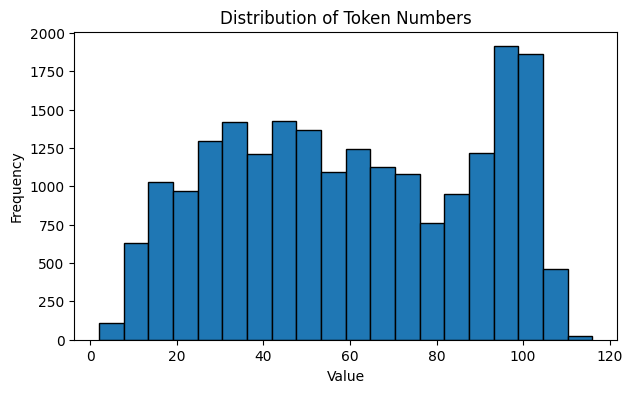

In [ ]:
plt.figure(figsize = (10,7))
plt.hist(num_tokens, bins=20, edgecolor='black')
plt.title("Distribution of Token Numbers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
max_tokens = 116

In [ ]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

In [ ]:
sum(num_tokens <= max_tokens)

21175

In [ ]:
len(num_tokens)

21175

### Fixing token counts of all documents (pad_sequences)

In [ ]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens, padding="pre")

In [ ]:
X_pad.shape

(21175, 116)

In [ ]:
X_num_tokens[801]

[2,
 68,
 7,
 25,
 9,
 17,
 236,
 22,
 9,
 4,
 46,
 37,
 4,
 791,
 902,
 484,
 95,
 2,
 248,
 21,
 5,
 2,
 213,
 5,
 14,
 4,
 262,
 394,
 23,
 71]

In [ ]:
len(X_num_tokens[801])

30

In [ ]:
X_pad[801]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   2,  68,   7,  25,   9,
        17, 236,  22,   9,   4,  46,  37,   4, 791, 902, 484,  95,   2,
       248,  21,   5,   2, 213,   5,  14,   4, 262, 394,  23,  71],
      dtype=int32)

In [ ]:
np.argmax(num_tokens)

15213

In [ ]:
np.array(X_num_tokens[11955])

array([   7,   18,    6,  257,  116,    3,  555,  399,    2,  131,  221,
          1,  204,    4,   78,   36,  281,  100,  161,    2,   24,  101,
        676,  204,  269,  495,   37,   89,  101,  331,    3,    1,   85,
         11,    7,   18,    6,   51,   70,   15,  427,  368,    1,  253,
        281,  204,    1,  306,   65,    3, 1809,   95,   26,   23,   58,
          4,   50,   18,    8,   31,    9,    1,  136])

In [ ]:
X_pad[11955]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    7,   18,
          6,  257,  116,    3,  555,  399,    2,  131,  221,    1,  204,
          4,   78,   36,  281,  100,  161,    2,   24,  101,  676,  204,
        269,  495,   37,   89,  101,  331,    3,    1,   85,   11,    7,
         18,    6,   51,   70,   15,  427,  368,    1,  253,  281,  204,
          1,  306,   65,    3, 1809,   95,   26,   23,   58,    4,   50,
         18,    8,   31,    9,    1,  136], dtype=int32)

In [ ]:
unique_labels = df['Recommended_IND'].unique()
unique_labels
#numeric

array([1, 0])

In [ ]:
df.head()

,Text,Recommended_IND
0,Absolutely wonderful - silky and sexy and comfortable,1
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",1
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",0
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,1


In [ ]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Recommended_IND, dtype: int64

### Train Set Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pad, y, stratify=y, test_size=0.10, random_state=42
)

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(
    X_train, y_train,test_size=0.10,stratify=y_train,random_state=42
)

### Modeling

In [ ]:
model1 = Sequential()

In [ ]:
max_tokens = 116
embedding_size = 50
num_words = 15001


In [ ]:
model1.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))

model1.add(Dropout(0.2))

model1.add(GRU(units=50, return_sequences=True))
model1.add(GRU(units=25, return_sequences=True))
model1.add(Dropout(0.2))

model1.add(GRU(units=12, return_sequences=False))
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = Adam(learning_rate=0.001)

In [ ]:
model1.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])


In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 116, 50)           750050    
                                                                 
 dropout_4 (Dropout)         (None, 116, 50)           0         
                                                                 
 gru_6 (GRU)                 (None, 116, 50)           15300     
                                                                 
 gru_7 (GRU)                 (None, 116, 25)           5775      
                                                                 
 dropout_5 (Dropout)         (None, 116, 25)           0         
                                                                 
 gru_8 (GRU)                 (None, 12)                1404      
                                                                 
 dense_2 (Dense)             (None, 1)                

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", verbose=1,
                           patience = 2, restore_best_weights=True)

In [ ]:
model1.fit(X_train, y_train, epochs=10, batch_size=64,       #sample_weight= classes_weights
         validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/10
268/268 [==============================] - 54s 122ms/step - loss: 0.3411 - recall: 0.9609 - val_loss: 0.2263 - val_recall: 0.9505
Epoch 2/10
268/268 [==============================] - 31s 115ms/step - loss: 0.1790 - recall: 0.9586 - val_loss: 0.2291 - val_recall: 0.9099
Epoch 3/10
268/268 [==============================] - 31s 114ms/step - loss: 0.1378 - recall: 0.9688 - val_loss: 0.2148 - val_recall: 0.9479
Epoch 3: early stopping


### Model Evaluation

In [ ]:
model_loss = pd.DataFrame(model1.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.341131,0.960873,0.226272,0.950450
1,0.179046,0.958584,0.229121,0.909910
2,0.137843,0.968813,0.214843,0.947876


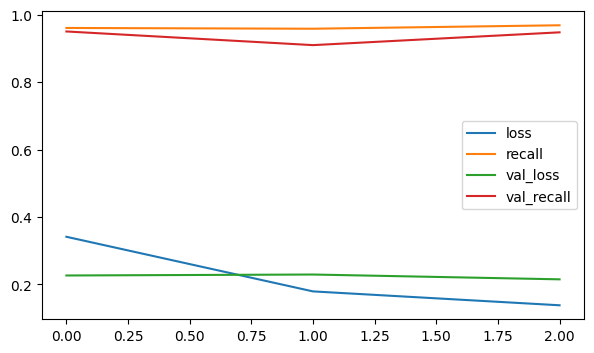

In [ ]:
model_loss.plot();

In [ ]:
model1.evaluate(X_test, y_test)

67/67 [==============================] - 2s 28ms/step - loss: 0.2434 - recall: 0.9618


[0.24340564012527466, 0.9617834687232971]

In [ ]:
model1.evaluate(X_train, y_train)

536/536 [==============================] - 15s 29ms/step - loss: 0.1709 - recall: 0.9699


[0.17087776958942413, 0.969885528087616]

In [ ]:
y_pred = model1.predict(X_test)

67/67 [==============================] - 4s 24ms/step


In [ ]:
y_pred

array([[0.9893084 ],
       [0.73613113],
       [0.9910914 ],
       ...,
       [0.99144536],
       [0.989171  ],
       [0.20184955]], dtype=float32)

In [ ]:
 y_prediction = [1 if prob >= 0.5 else 0 for prob in y_pred]
 y_prediction[:20]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]

In [ ]:
y_test

6489     1
4843     0
8552     1
19799    1
7140     1
        ..
11826    1
22264    1
16128    1
16607    1
2198     0
Name: Recommended_IND, Length: 2118, dtype: int64

In [ ]:
y_pred_train = model1.predict(X_train)

536/536 [==============================] - 10s 20ms/step


In [ ]:
y_prediction_train = [1 if prob >= 0.5 else 0 for prob in y_pred_train]
y_prediction_train[:10]

[1, 1, 0, 0, 1, 1, 1, 1, 1, 1]

In [ ]:
y_train

15099    1
19797    1
2859     0
14317    0
11979    1
        ..
10919    1
13691    1
15257    1
18767    1
5079     1
Name: Recommended_IND, Length: 17151, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

print(confusion_matrix(y_test, y_prediction))
print("-------------------------------------------------------")
print(classification_report(y_test, y_prediction))

[[ 260  131]
 [  66 1661]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.66      0.73       391
           1       0.93      0.96      0.94      1727

    accuracy                           0.91      2118
   macro avg       0.86      0.81      0.83      2118
weighted avg       0.90      0.91      0.90      2118



In [ ]:
print(confusion_matrix(y_train, y_prediction_train))
print("-------------------------------------------------------")
print(classification_report(y_train, y_prediction_train))


[[ 2491   680]
 [  421 13559]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      3171
           1       0.95      0.97      0.96     13980

    accuracy                           0.94     17151
   macro avg       0.90      0.88      0.89     17151
weighted avg       0.93      0.94      0.93     17151



67/67 [==============================] - 1s 19ms/step


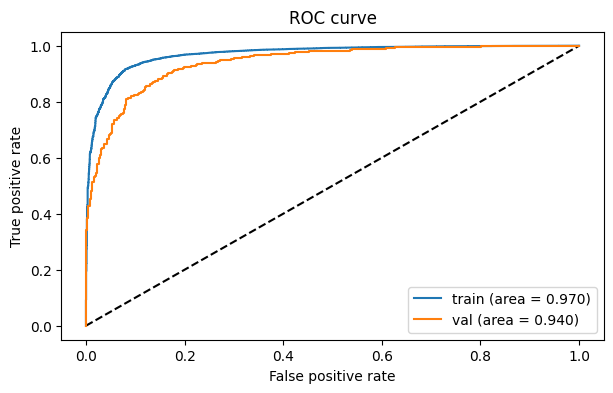

In [ ]:
roc_auc_plot(model1, y_train, X_train, y_test, X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred, multi_class='ovr') # For binary classification problems, generally I don't need to explicitly specify the multi_class parameter multi_class='ovr', as scikit-learn will automatically recognize that it's a binary problem and choose an appropriate strategy.

0.9399117669272589

In [ ]:
DL_AP = average_precision_score(y_test, y_pred)
DL_f1 = f1_score(y_test, y_prediction)
DL_rec = recall_score(y_test, y_prediction)

## BERT Modeling

### Read Data

In [ ]:
df_BERT = df.copy()
df_BERT

,Text,Recommended_IND
0,Absolutely wonderful - silky and sexy and comfortable,1
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",1
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",0
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,1
...,...,...
23478,I was surprised at the positive reviews for this product. its terrible! it cuts you in a weird place to make you look wide. the skirt is also not like the picture. its darker and heavier. the material isnt great. i had to return.,0
23479,"So i wasn't sure about ordering this skirt because i couldn't see it in person first but i'm so glad i did. the skirt and design is well made and doesn't look or feel cheap. the color isn't blaring, offensive red so it worked with my pale skin better than i anticipated. i wore it to my daughter's dance production with tall boots and a sweater and i got numerous compliments. fit is true, i am 5'2"" and i picked the petite length. the skirt has a slight a-line rather than a tight pencil fit but the",1
23481,I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.,1
23483,"This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have been great.",0


In [ ]:
df_BERT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21175 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Text             21175 non-null  object
 1   Recommended_IND  21175 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 496.3+ KB


In [ ]:
df_BERT.shape

(21175, 2)

In [ ]:
sum(df_BERT.duplicated())
#There is no duplicate data

7

In [ ]:
df_BERT.isnull().sum()

Text               0
Recommended_IND    0
dtype: int64

In [ ]:
df_BERT.reset_index(drop=True, inplace=True)


In [ ]:
df_BERT.Recommended_IND.value_counts()

1    17261
0     3914
Name: Recommended_IND, dtype: int64

In [ ]:
df_BERT.Recommended_IND.value_counts(normalize=True)

1    0.815159
0    0.184841
Name: Recommended_IND, dtype: float64

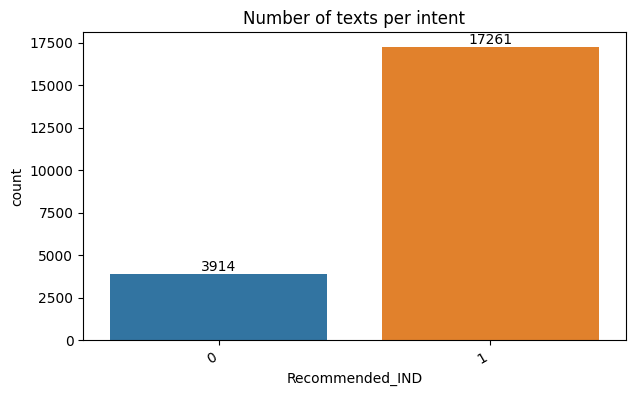

In [ ]:
chart = sns.countplot(x= "Recommended_IND", data=df_BERT)
chart.bar_label(chart.containers[0])
plt.title("Number of texts per intent")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');

### Train test split

In [ ]:
X=df_BERT["Text"]
y=df_BERT["Recommended_IND"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

### Tokenization

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [ ]:
tokenizer.vocab

OrderedDict([('[PAD]', 0),
             ('[unused1]', 1),
             ('[unused2]', 2),
             ('[unused3]', 3),
             ('[unused4]', 4),
             ('[unused5]', 5),
             ('[unused6]', 6),
             ('[unused7]', 7),
             ('[unused8]', 8),
             ('[unused9]', 9),
             ('[unused10]', 10),
             ('[unused11]', 11),
             ('[unused12]', 12),
             ('[unused13]', 13),
             ('[unused14]', 14),
             ('[unused15]', 15),
             ('[unused16]', 16),
             ('[unused17]', 17),
             ('[unused18]', 18),
             ('[unused19]', 19),
             ('[unused20]', 20),
             ('[unused21]', 21),
             ('[unused22]', 22),
             ('[unused23]', 23),
             ('[unused24]', 24),
             ('[unused25]', 25),
             ('[unused26]', 26),
             ('[unused27]', 27),
             ('[unused28]', 28),
             ('[unused29]', 29),
             ('[unused30]', 30),
 

In [ ]:
print(len(tokenizer.vocab))

28996


In [ ]:
tokenizer2 = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
print(len(tokenizer2.vocab))

30522


### Fixing token counts of all documents

In [ ]:
# For every sentence...
number_tokens_sentences = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer2.encode(sent, add_special_tokens=True) # we use tokenizer2 for uncased
    number_tokens_sentences.append(len(input_ids))

print('Max sentence length: ', max(number_tokens_sentences))


Max sentence length:  162


In [ ]:
np.array(number_tokens_sentences).mean()

76.31556080283353

In [ ]:
token_size = 162
sum(np.array(number_tokens_sentences) <= token_size) / len(number_tokens_sentences)

1.0

### Transformation Vectors to Matrices

In [ ]:
def transformation(X):
  seq_len = 162

  Xids = []
  Xmask = []


  for text in X:

      tokens = tokenizer2.encode_plus(text, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True)

      Xids.append(tokens['input_ids'])
      Xmask.append(tokens['attention_mask'])


  return np.array(Xids), np.array(Xmask)

In [ ]:
Xids_train, Xmask_train = transformation(X_train)

# We are creating 2 separate matrices for our training set.

Xids_test, Xmask_test = transformation(X_test)
# We are creating 2 separate matrices for our test set.

In [ ]:
Xids_train

array([[  101, 16082,  2008, ...,     0,     0,     0],
       [  101,  1045,  2428, ...,     0,     0,     0],
       [  101,  2023, 14329, ...,     0,     0,     0],
       ...,
       [  101,  2023, 12121, ...,     0,     0,     0],
       [  101,  3866,  2023, ...,     0,     0,     0],
       [  101,  1045,  4149, ...,     0,     0,     0]])

In [ ]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (19057, 162)
Xmask_train.shape : (19057, 162)
Xids_test.shape   : (2118, 162)
Xmask_test.shape  : (2118, 162)


In [ ]:
y_train

1303     1
402      0
21006    1
1742     0
7659     1
        ..
3363     1
18702    1
9168     1
13146    1
20378    1
Name: Recommended_IND, Length: 19057, dtype: int64

### Transformation Matrix to Tensorflow tensor

In [ ]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, y_train))
dataset_train


<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, y_test))
dataset_test


<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels


In [ ]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)


In [ ]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(), dtype=tf.int64, name=None))>

### Batch Size

In [ ]:
batch_size = 32


train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)


In [ ]:
train_ds

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 162), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 162), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
len(X_train)

19057

In [ ]:
len(X_train)/16

1191.0625

In [ ]:
print(len(train_ds))
print(len(train_ds)*3)
print(int(0.1*len(train_ds)*3))

596
1788
178


### Creating optimization

In [ ]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.7 MB/s eta 0:00:00


In [ ]:
from official.nlp import optimization
epochs = 3
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')


### Creating Model with TPU

In [ ]:
def create_binary_model():
    from transformers import TFBertModel

    model_BERT = TFBertModel.from_pretrained("bert-base-uncased")

    input_ids = tf.keras.layers.Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model_BERT.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"]

    x = tf.keras.layers.Dense(80, activation='relu')(embeddings)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.1)(x)

    # Modify output layer for binary classification
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

# Create the binary classification model
binary_model = create_binary_model()


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
with strategy.scope():
  optimizer = optimizer
  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall()
  model_BERT = create_binary_model()
  model_BERT.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
model_BERT.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                         

### Model Fiting

In [ ]:
model_BERT.fit(train_ds, validation_data= val_ds, epochs=epochs)

Epoch 1/3
596/596 [==============================] - 211s 204ms/step - loss: 0.5513 - recall: 0.7068 - val_loss: 0.3525 - val_recall: 0.9398
Epoch 2/3
596/596 [==============================] - 66s 111ms/step - loss: 0.4328 - recall: 0.8415 - val_loss: 0.2530 - val_recall: 0.9699
Epoch 3/3
596/596 [==============================] - 63s 106ms/step - loss: 0.3776 - recall: 0.9115 - val_loss: 0.2973 - val_recall: 0.9664


### Model evaluation

In [ ]:
model_loss = pd.DataFrame(model_BERT.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.551265,0.706772,0.352510,0.939780
1,0.432846,0.841509,0.252955,0.969890
2,0.377564,0.911484,0.297333,0.966416


<Axes: >

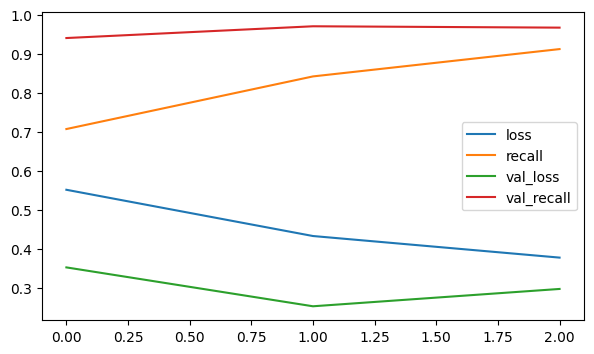

In [ ]:
model_loss.plot()

In [ ]:
model_BERT.evaluate(train_ds)

596/596 [==============================] - 31s 50ms/step - loss: 0.1700 - recall: 0.9855


[0.16997483372688293, 0.9854512810707092]

In [ ]:
model_BERT.evaluate(val_ds)

67/67 [==============================] - 5s 44ms/step - loss: 0.2973 - recall: 0.9664


[0.2973327040672302, 0.9664157629013062]

In [ ]:
y_pred = model_BERT.predict(val_ds)

67/67 [==============================] - 33s 165ms/step


In [ ]:
y_pred

array([[9.1715837e-01],
       [2.6822090e-06],
       [9.0059501e-01],
       ...,
       [9.1562247e-01],
       [9.1225266e-01],
       [3.0145645e-03]], dtype=float32)

In [ ]:
 y_prediction = [1 if prob >= 0.5 else 0 for prob in y_pred]
 y_prediction[:20]

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0]

In [ ]:
y_test

5848     1
4370     0
7729     1
17853    1
6446     1
        ..
10677    1
20072    1
14532    1
14964    1
1982     0
Name: Recommended_IND, Length: 2118, dtype: int64

In [ ]:
y_pred_train = model_BERT.predict(train_ds)

596/596 [==============================] - 22s 35ms/step


In [ ]:
y_prediction_train = [1 if prob >= 0.5 else 0 for prob in y_pred_train]
y_prediction_train[:10]

[1, 0, 1, 0, 1, 1, 1, 1, 1, 1]

In [ ]:
y_train

1303     1
402      0
21006    1
1742     0
7659     1
        ..
3363     1
18702    1
9168     1
13146    1
20378    1
Name: Recommended_IND, Length: 19057, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

print(confusion_matrix(y_test, y_prediction))
print("-------------------------------------------------------")
print(classification_report(y_test, y_prediction))

[[ 333   58]
 [  58 1669]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       391
           1       0.97      0.97      0.97      1727

    accuracy                           0.95      2118
   macro avg       0.91      0.91      0.91      2118
weighted avg       0.95      0.95      0.95      2118



In [ ]:
print(confusion_matrix(y_train, y_prediction_train))
print("-------------------------------------------------------")
print(classification_report(y_train, y_prediction_train))

[[ 3333   190]
 [  226 15308]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3523
           1       0.99      0.99      0.99     15534

    accuracy                           0.98     19057
   macro avg       0.96      0.97      0.96     19057
weighted avg       0.98      0.98      0.98     19057



67/67 [==============================] - 3s 27ms/step


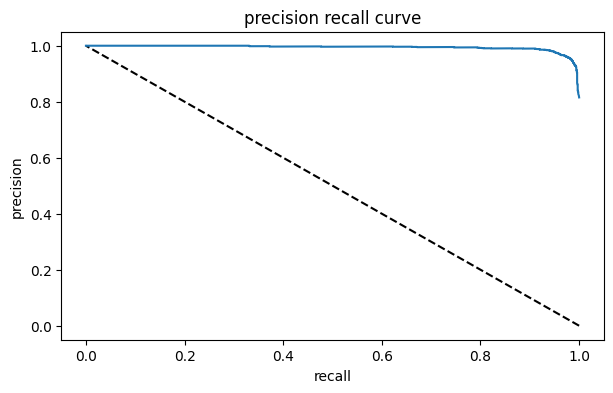

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
y_pred_proba = model_BERT.predict(val_ds)
precision, recall, thresholds = precision_recall_curve( y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba, multi_class='ovr') #For binary classification problems, generally I don't need to explicitly specify the multi_class parameter multi_class='ovr', as scikit-learn will automatically recognize that it's a binary problem and choose an appropriate strategy.

0.9765037607903361

In [ ]:
average_precision_score(y_test, y_pred_proba)

0.9940259265875316

In [ ]:
BERT_AP = average_precision_score(y_test, y_pred)
BERT_f1 = f1_score(y_test, y_prediction)
BERT_rec = recall_score(y_test, y_prediction)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

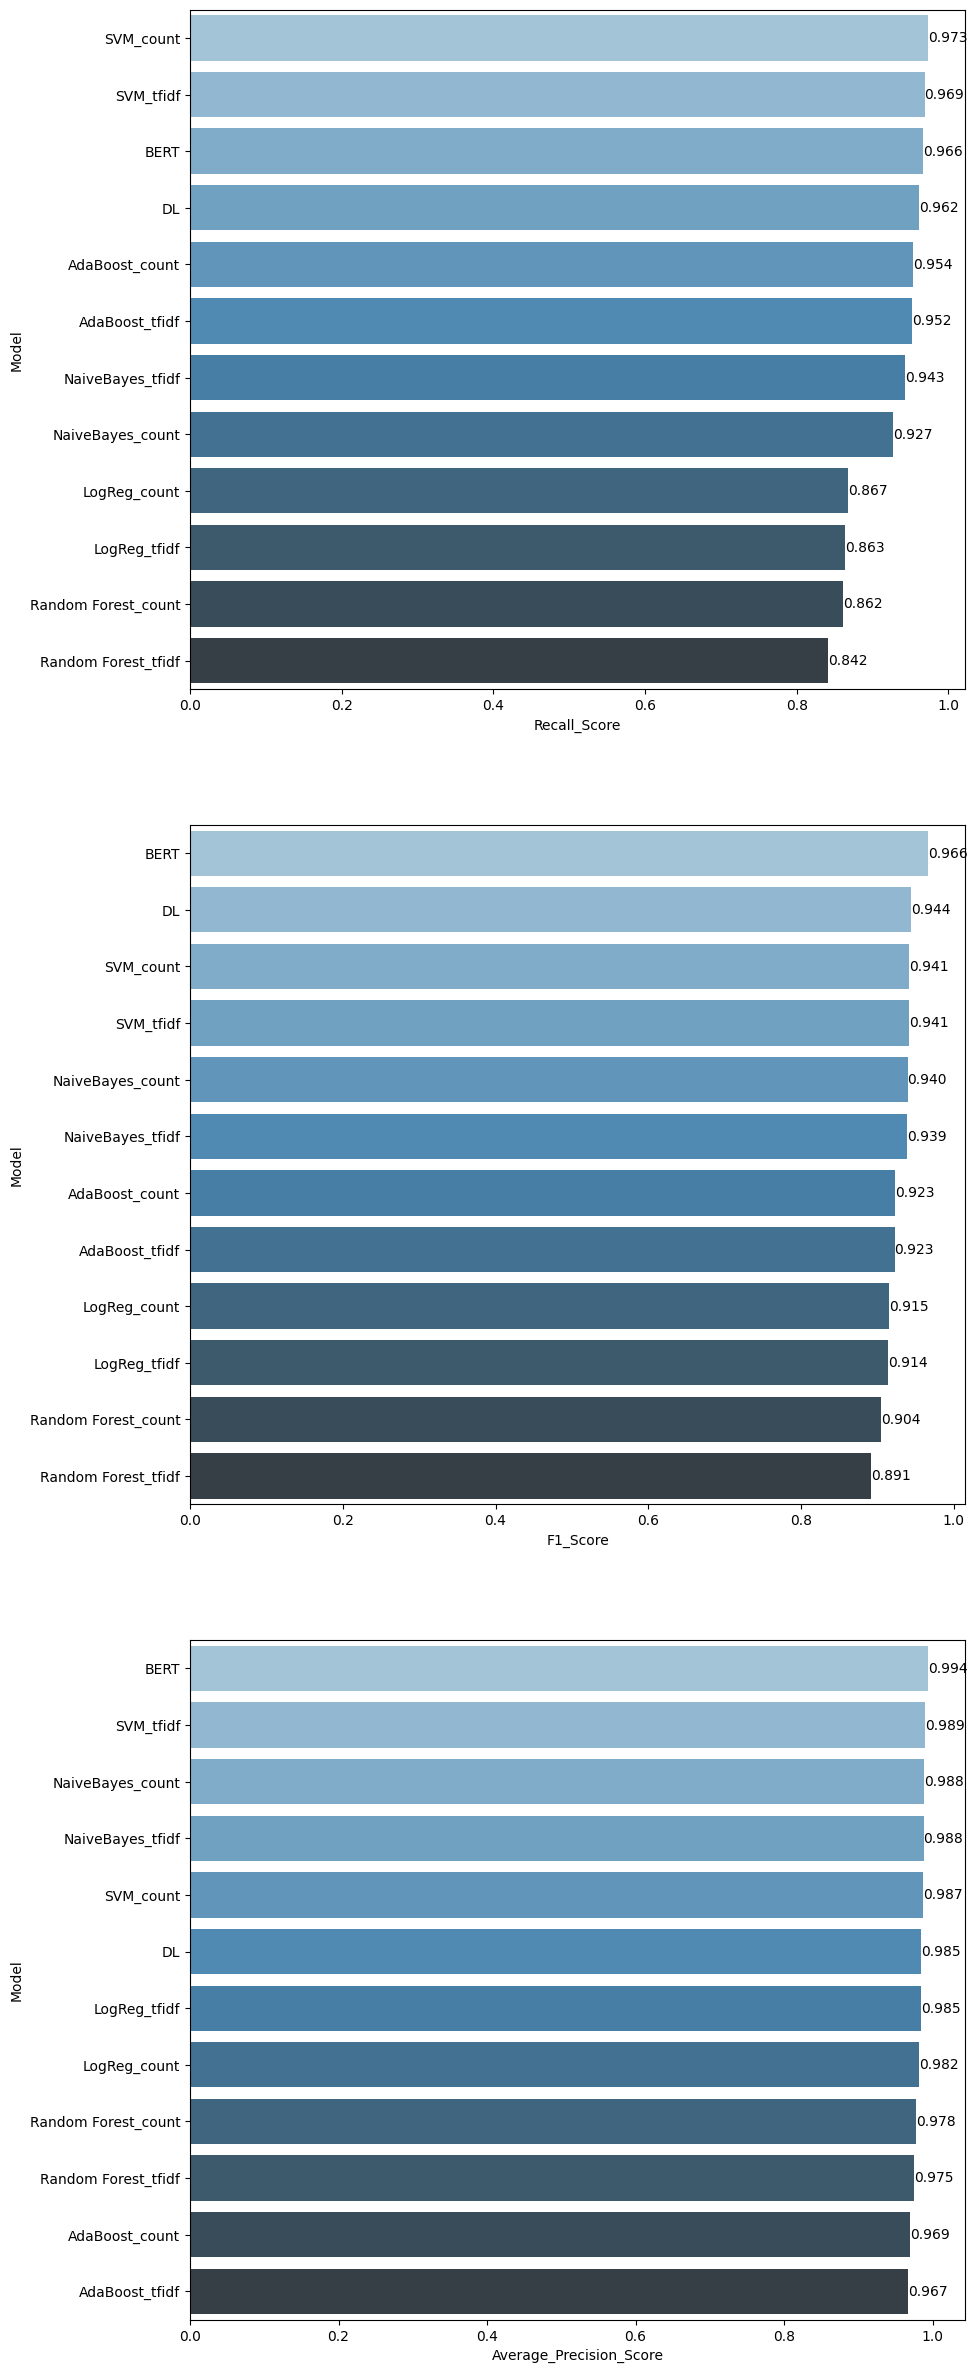

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT"],

                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1, rf_count_f1, ada_count_f1, nb_tfidf_f1,
                                     log_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1,
                                     BERT_f1],

                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, rf_count_rec, ada_count_rec, nb_tfidf_rec,
                                         log_tfidf_rec, svc_tfidf_rec, rf_tfidf_rec, ada_tfidf_rec, DL_rec,
                                         BERT_rec],

                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count, ada_AP_count, nb_AP_tfidf,
                                                    log_AP_tfidf, svc_AP_tfidf, rf_AP_tfidf, ada_AP_tfidf, DL_AP,
                                                    BERT_AP]})


plt.figure(figsize=(10,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score",
                              ascending=False)
ax=sns.barplot(x="Recall_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score",
                              ascending=False)
ax=sns.barplot(x="F1_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score",
                              ascending=False)
ax=sns.barplot(x="Average_Precision_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

#As showen SVM_count and BERT is the best for our task